# SRB Collection
Notebook for gathering and visualization and save of all of the handpicked SRB

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Load Dataset

In [2]:
path = '../datasets/preprocessed/'
rat = pd.read_hdf(path+'velocityDatabase.h5', 'Rat_Behavior').set_index('index')
rat.head(3)

,Frame,Time,X_Pos,Y_Pos,Z_Pos,X_Ori,Y_Ori,Z_Ori,session_id,Filtered,Theta,U,U_var
index,,,,,,,,,,,,,
1,21,0.087500,-0.056324,0.072395,-0.049580,-0.630137,-0.768168,0.025253,0,1,-87.705039,156.977244,NaN
2,22,0.091667,-0.056285,0.072442,-0.049525,-0.630120,-0.767833,0.032642,0,1,-87.034598,160.892886,NaN
3,23,0.095833,-0.056241,0.072488,-0.049468,-0.629928,-0.767622,0.040258,0,1,-86.343297,165.938758,NaN


In [3]:
stim = pd.read_hdf(path+'relationalDatabase.h5', 'Events').set_index('index')
stim.drop(labels=['MotiveExpTimeSecs'], axis=1, inplace=True)

stim.head()

,Frame,Time,visible,speed,session_id
index,,,,,
0,0,0.000000,0,0.0,0
1,0,0.000000,0,0.0,0
2,1,0.004167,0,0.0,0
3,2,0.008333,0,0.0,0
4,3,0.012500,0,0.0,0


In [4]:
sessions = pd.read_hdf(path+'relationalDatabase.h5', 'Sessions')
sessions.drop(labels=['index'], axis=1, inplace=True)
sessions

,session_id,rat_id,date,experimenter,original_name,video_name,VRspeed
0,0,VR-5A,2017-07-13 05.09.09.088 PM,Nicholas A. Del Grosso,VRAcuityExp_2017-07-13_17-09-07_VR-5A_NIC,VRAcuityExp_2017-07-13_17-09-07_VR-5A_NIC-Came...,[ 0. 7. 14. 28.]
1,1,VR-3A,2017-07-13 04.11.56.036 PM,Nicholas A. Del Grosso,VRAcuityExp_2017-07-13_16-11-46_VR-3A_NIC,VRAcuityExp_2017-07-13_16-11-46_VR-3A_NIC-Came...,[ 0. 7. 14. 28.]
2,2,VR-3A,2017-07-13 04.27.09.355 PM,Nicholas A. Del Grosso,VRAcuityExp_2017-07-13_16-27-08_VR-3A_NIC,VRAcuityExp_2017-07-13_16-27-08_VR-3A_NIC-Came...,[ 0. 7. 14. 28.]
3,3,VR-4A,2017-07-13 02.39.20.315 PM,Nicholas A. Del Grosso,VRAcuityExp_2017-07-13_14-39-17_VR-4A_NIC,VRAcuityExp_2017-07-13_14-39-17_VR-4A_NIC-Came...,[ 0. 7. 14. 28.]
4,4,VR-2A,2017-07-13 03.19.28.235 PM,Eduardo Blanco-Hernandez,VRAcuityExp_2017-07-13_15-19-09_VR-2A_EDU,VRAcuityExp_2017-07-13_15-19-09_VR-2A_EDU-Came...,[ 0. 7. 14. 28.]
5,5,VR-1B,2017-07-13 03.53.42.156 PM,Nicholas A. Del Grosso,VRAcuityExp_2017-07-13_15-53-40_VR-1B_NIC,VRAcuityExp_2017-07-13_15-53-40_VR-1B_NIC-Came...,[ 0. 7. 14. 28.]
6,6,VR-2B,2017-07-13 03.05.18.468 PM,Nicholas A. Del Grosso,VRAcuityExp_2017-07-13_15-05-16_VR-2B_NIC,VRAcuityExp_2017-07-13_15-05-16_VR-2B_NIC-Came...,[ 0. 7. 14. 28.]
7,7,VR-1A,2017-07-13 03.38.35.628 PM,Nicholas A. Del Grosso,VRAcuityExp_2017-07-13_15-38-34_VR-1A_NIC,VRAcuityExp_2017-07-13_15-38-34_VR-1A_NIC-Came...,[ 0. 7. 14. 28.]


## Merge Dataset

In [5]:
df = pd.merge(rat, stim, on=['Frame', 'Time', 'session_id'])
df.head()

,Frame,Time,X_Pos,Y_Pos,Z_Pos,X_Ori,Y_Ori,Z_Ori,session_id,Filtered,Theta,U,U_var,visible,speed
0,21,0.087500,-0.056324,0.072395,-0.049580,-0.630137,-0.768168,0.025253,0,1,-87.705039,156.977244,NaN,0,0.0
1,22,0.091667,-0.056285,0.072442,-0.049525,-0.630120,-0.767833,0.032642,0,1,-87.034598,160.892886,NaN,0,0.0
2,23,0.095833,-0.056241,0.072488,-0.049468,-0.629928,-0.767622,0.040258,0,1,-86.343297,165.938758,NaN,0,0.0
3,24,0.100000,-0.056195,0.072532,-0.049408,-0.629630,-0.767440,0.048207,0,1,-85.621766,173.153665,NaN,0,0.0
4,25,0.104167,-0.056142,0.072577,-0.049344,-0.629153,-0.767353,0.056476,0,1,-84.870594,180.266748,NaN,0,0.0


## Experiment 0

In [6]:
dfSRB0 = pd.DataFrame()
dd0 = df[df['session_id']==0]
dd0.head(3)

,Frame,Time,X_Pos,Y_Pos,Z_Pos,X_Ori,Y_Ori,Z_Ori,session_id,Filtered,Theta,U,U_var,visible,speed
0,21,0.087500,-0.056324,0.072395,-0.049580,-0.630137,-0.768168,0.025253,0,1,-87.705039,156.977244,NaN,0,0.0
1,22,0.091667,-0.056285,0.072442,-0.049525,-0.630120,-0.767833,0.032642,0,1,-87.034598,160.892886,NaN,0,0.0
2,23,0.095833,-0.056241,0.072488,-0.049468,-0.629928,-0.767622,0.040258,0,1,-86.343297,165.938758,NaN,0,0.0


In [7]:
sessions[sessions['session_id']=='0'].original_name

0    VRAcuityExp_2017-07-13_17-09-07_VR-5A_NIC
Name: original_name, dtype: object

1. 156, 158, 160
2. 226, 227
3. 230, 231
4. 300, 301   - rejected
5. 318, 319
6. 364, 365

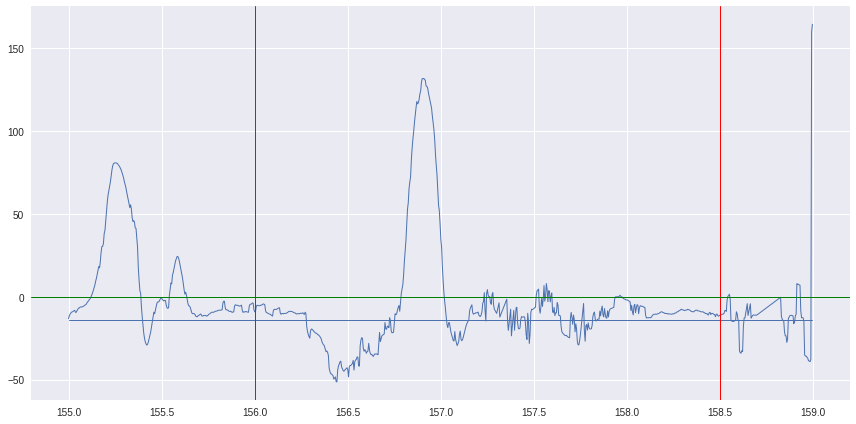

In [8]:
#  156, 158
a, b = 155, 159
xmin, xmax = 156, 158.5
dpart = dd0[(dd0['Time']>a) & (dd0['Time']<b)]

g = sns.FacetGrid(data=dpart, size=6, aspect=2)#, ylim=[-30,30])
g.map(plt.plot, "Time", "U", alpha=1, linewidth=1);
g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1);
g.map(plt.axvline, x=xmin, alpha=1, linewidth=1, color='red');
g.map(plt.axvline, x=xmax, alpha=1, linewidth=1, color='red');
g.map(plt.axhline, y=0, alpha=1, linewidth=1, color='green');

In [9]:
dpart0 = dd0[(dd0['Time']>xmin) & (dd0['Time']<xmax)]
dfSRB0 = pd.concat([dfSRB0, dpart0], axis=0, ignore_index=True)

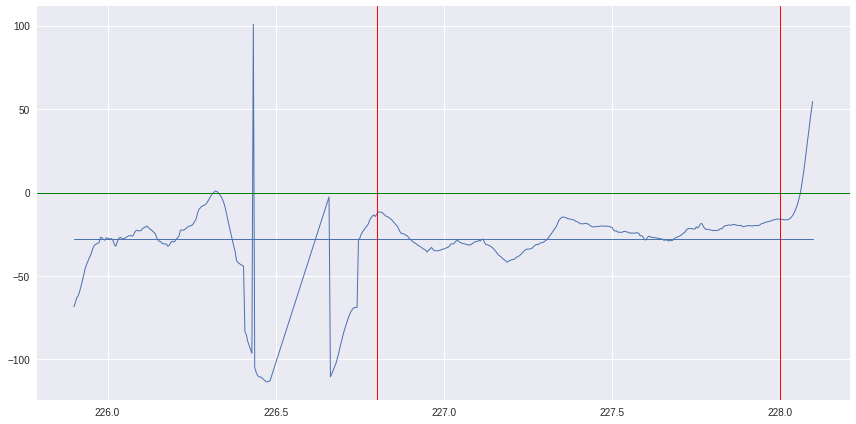

In [10]:
# 226, 227
a, b = 225.9, 228.1
xmin, xmax = 226.8, 228
dpart = dd0[(dd0['Time']>a) & (dd0['Time']<b)]

g = sns.FacetGrid(data=dpart, size=6, aspect=2)#, ylim=[-30,30])
g.map(plt.plot, "Time", "U", alpha=1, linewidth=1);
g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1);
g.map(plt.axvline, x=xmin, alpha=1, linewidth=1, color='red');
g.map(plt.axvline, x=xmax, alpha=1, linewidth=1, color='red');
g.map(plt.axhline, y=0, alpha=1, linewidth=1, color='green');

In [11]:
dpart0 = dd0[(dd0['Time']>xmin) & (dd0['Time']<xmax)]
dfSRB0 = pd.concat([dfSRB0, dpart0], axis=0, ignore_index=True)

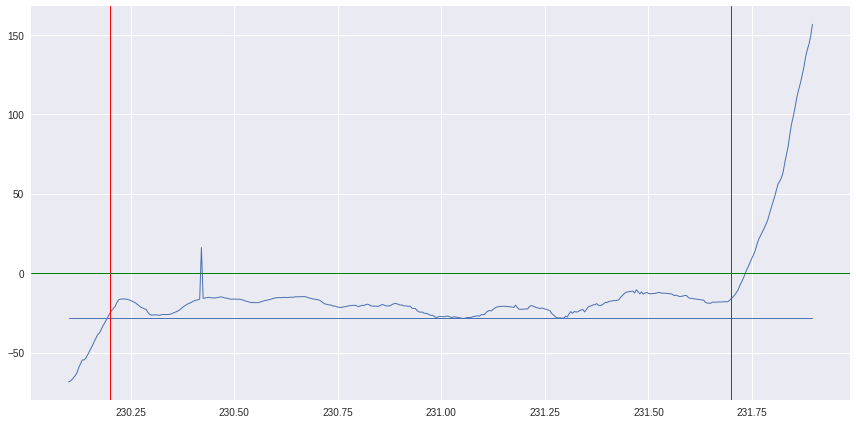

In [12]:
# 230, 231
a, b = 230.1, 231.9
xmin, xmax = 230.2, 231.7
dpart = dd0[(dd0['Time']>a) & (dd0['Time']<b)]

g = sns.FacetGrid(data=dpart, size=6, aspect=2)#, ylim=[-30,30])
g.map(plt.plot, "Time", "U", alpha=1, linewidth=1);
g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1);
g.map(plt.axvline, x=xmin, alpha=1, linewidth=1, color='red');
g.map(plt.axvline, x=xmax, alpha=1, linewidth=1, color='red');
g.map(plt.axhline, y=0, alpha=1, linewidth=1, color='green');

In [13]:
dpart0 = dd0[(dd0['Time']>xmin) & (dd0['Time']<xmax)]
dfSRB0 = pd.concat([dfSRB0, dpart0], axis=0, ignore_index=True)

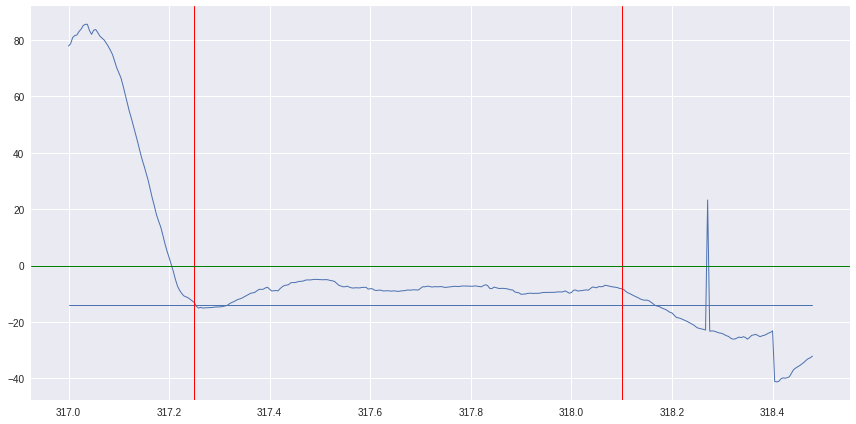

In [14]:
# 318, 319
a, b = 317, 318.5
xmin, xmax = 317.25, 318.1
dpart = dd0[(dd0['Time']>a) & (dd0['Time']<b)]

g = sns.FacetGrid(data=dpart, size=6, aspect=2)#, ylim=[-30,30])
g.map(plt.plot, "Time", "U", alpha=1, linewidth=1);
g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1);
g.map(plt.axvline, x=xmin, alpha=1, linewidth=1, color='red');
g.map(plt.axvline, x=xmax, alpha=1, linewidth=1, color='red');
g.map(plt.axhline, y=0, alpha=1, linewidth=1, color='green');

In [15]:
dpart0 = dd0[(dd0['Time']>xmin) & (dd0['Time']<xmax)]
dfSRB0 = pd.concat([dfSRB0, dpart0], axis=0, ignore_index=True)

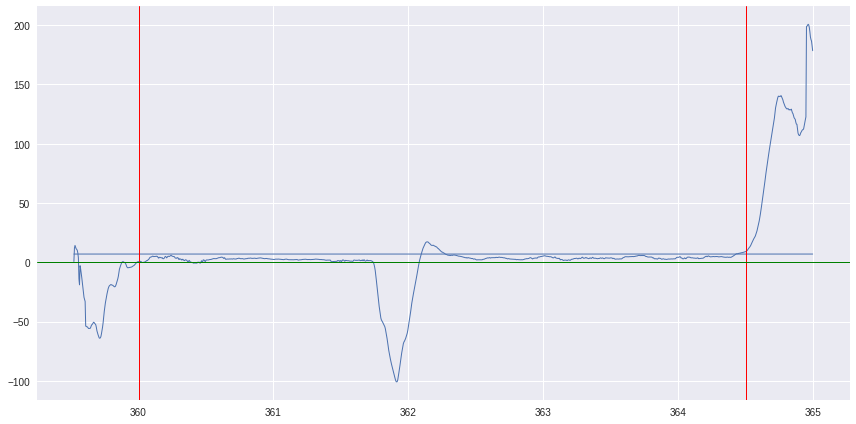

In [16]:
# 364, 365
a, b = 359.5, 365
xmin, xmax = 360, 364.5
dpart = dd0[(dd0['Time']>a) & (dd0['Time']<b)]

g = sns.FacetGrid(data=dpart, size=6, aspect=2)#, ylim=[-30,30])
g.map(plt.plot, "Time", "U", alpha=1, linewidth=1);
g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1);
g.map(plt.axvline, x=xmin, alpha=1, linewidth=1, color='red');
g.map(plt.axvline, x=xmax, alpha=1, linewidth=1, color='red');
g.map(plt.axhline, y=0, alpha=1, linewidth=1, color='green');

In [17]:
dpart0 = dd0[(dd0['Time']>xmin) & (dd0['Time']<xmax)]
dfSRB0 = pd.concat([dfSRB0, dpart0], axis=0, ignore_index=True)

## Experiment 1

In [18]:
dfSRB1 = pd.DataFrame()
dd1 = df[df['session_id']==1]
dd1.head(3)

,Frame,Time,X_Pos,Y_Pos,Z_Pos,X_Ori,Y_Ori,Z_Ori,session_id,Filtered,Theta,U,U_var,visible,speed
126013,21,0.087500,0.036536,0.288617,0.066464,0.377179,0.677851,0.630569,1,1,30.886010,15.039417,NaN,0,0.0
126014,22,0.091667,0.036496,0.288559,0.066395,0.377483,0.678772,0.629383,1,1,30.953919,16.296910,NaN,0,0.0
126015,23,0.095833,0.036444,0.288504,0.066322,0.377716,0.679922,0.627983,1,1,31.025870,17.270954,NaN,0,0.0


In [19]:
sessions[sessions['session_id']=='1'].original_name

1    VRAcuityExp_2017-07-13_16-11-46_VR-3A_NIC
Name: original_name, dtype: object

1. 181, 183
2. 184, 185
3. 213, 215
4. 221, 224
5. 371, 375 - slow -28
6. 379, 380
7. 550, 553
8. 558, 560

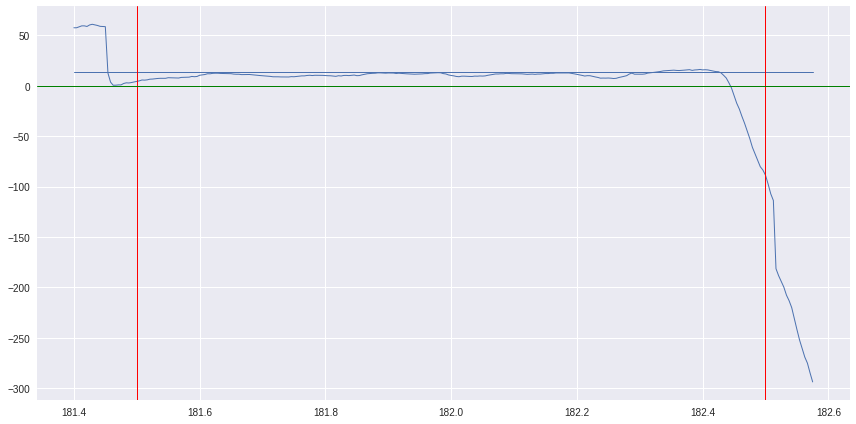

In [20]:
# 181, 183
a, b = 181.4, 182.6
xmin, xmax = 181.5, 182.5
dpart = dd1[(dd1['Time']>a) & (dd1['Time']<b)]

g = sns.FacetGrid(data=dpart, size=6, aspect=2)#, ylim=[-30,30])
g.map(plt.plot, "Time", "U", alpha=1, linewidth=1);
g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1);
g.map(plt.axvline, x=xmin, alpha=1, linewidth=1, color='red');
g.map(plt.axvline, x=xmax, alpha=1, linewidth=1, color='red');
g.map(plt.axhline, y=0, alpha=1, linewidth=1, color='green');

In [21]:
dpart1 = dd1[(dd1['Time']>xmin) & (dd1['Time']<xmax)]
dfSRB1 = pd.concat([dfSRB1, dpart1], axis=0, ignore_index=True)

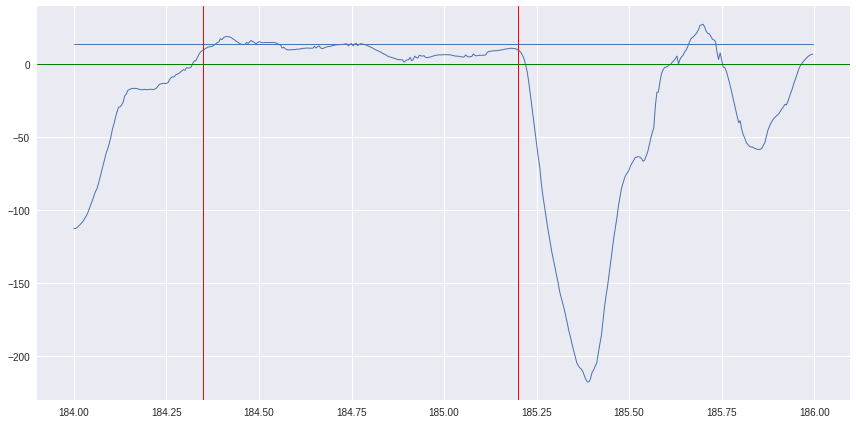

In [22]:
# 184, 185
a, b = 184, 186
xmin, xmax = 184.35, 185.2
dpart = dd1[(dd1['Time']>a) & (dd1['Time']<b)]

g = sns.FacetGrid(data=dpart, size=6, aspect=2)#, ylim=[-30,30])
g.map(plt.plot, "Time", "U", alpha=1, linewidth=1);
g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1);
g.map(plt.axvline, x=xmin, alpha=1, linewidth=1, color='red');
g.map(plt.axvline, x=xmax, alpha=1, linewidth=1, color='red');
g.map(plt.axhline, y=0, alpha=1, linewidth=1, color='green');

In [23]:
dpart1 = dd1[(dd1['Time']>xmin) & (dd1['Time']<xmax)]
dfSRB1 = pd.concat([dfSRB1, dpart1], axis=0, ignore_index=True)

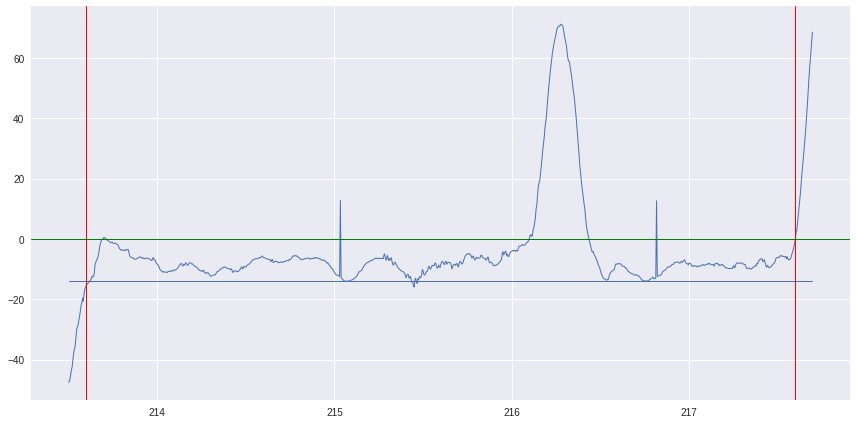

In [24]:
# 213, 215
a, b = 213.5, 217.7
xmin, xmax = 213.6, 217.6
dpart = dd1[(dd1['Time']>a) & (dd1['Time']<b)]

g = sns.FacetGrid(data=dpart, size=6, aspect=2)#, ylim=[-30,30])
g.map(plt.plot, "Time", "U", alpha=1, linewidth=1);
g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1);
g.map(plt.axvline, x=xmin, alpha=1, linewidth=1, color='red');
g.map(plt.axvline, x=xmax, alpha=1, linewidth=1, color='red');
g.map(plt.axhline, y=0, alpha=1, linewidth=1, color='green');

In [25]:
dpart1 = dd1[(dd1['Time']>xmin) & (dd1['Time']<xmax)]
dfSRB1 = pd.concat([dfSRB1, dpart1], axis=0, ignore_index=True)

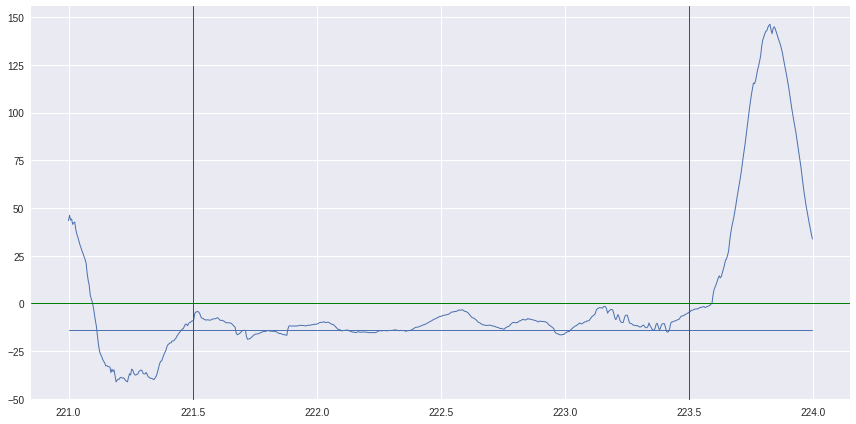

In [26]:
#  221, 224
a, b =  221, 224
xmin, xmax =  221.5, 223.5
dpart = dd1[(dd1['Time']>a) & (dd1['Time']<b)]

g = sns.FacetGrid(data=dpart, size=6, aspect=2)#, ylim=[-30,30])
g.map(plt.plot, "Time", "U", alpha=1, linewidth=1);
g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1);
g.map(plt.axvline, x=xmin, alpha=1, linewidth=1, color='red');
g.map(plt.axvline, x=xmax, alpha=1, linewidth=1, color='red');
g.map(plt.axhline, y=0, alpha=1, linewidth=1, color='green');

In [27]:
dpart1 = dd1[(dd1['Time']>xmin) & (dd1['Time']<xmax)]
dfSRB1 = pd.concat([dfSRB1, dpart1], axis=0, ignore_index=True)

In [28]:
371, 375

(371, 375)

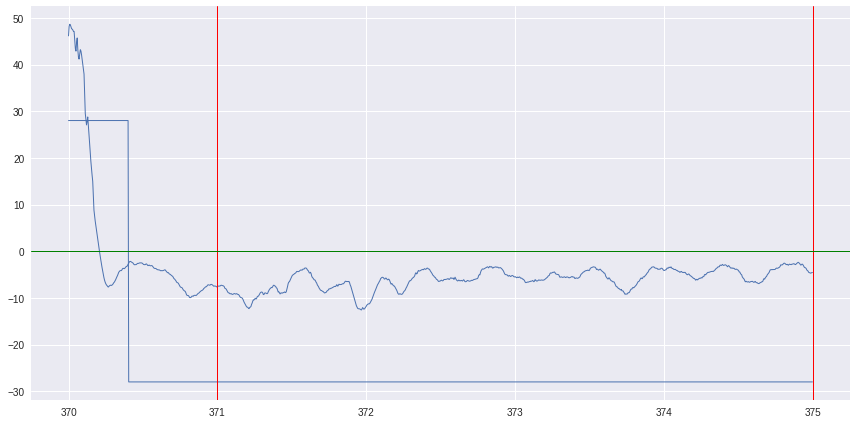

In [29]:
# 371, 375
a, b =  370, 375
xmin, xmax =  371, 375
dpart = dd1[(dd1['Time']>a) & (dd1['Time']<b)]

g = sns.FacetGrid(data=dpart, size=6, aspect=2)#, ylim=[-30,30])
g.map(plt.plot, "Time", "U", alpha=1, linewidth=1);
g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1);
g.map(plt.axvline, x=xmin, alpha=1, linewidth=1, color='red');
g.map(plt.axvline, x=xmax, alpha=1, linewidth=1, color='red');
g.map(plt.axhline, y=0, alpha=1, linewidth=1, color='green');

In [30]:
dpart1 = dd1[(dd1['Time']>xmin) & (dd1['Time']<xmax)]
dfSRB1 = pd.concat([dfSRB1, dpart1], axis=0, ignore_index=True)

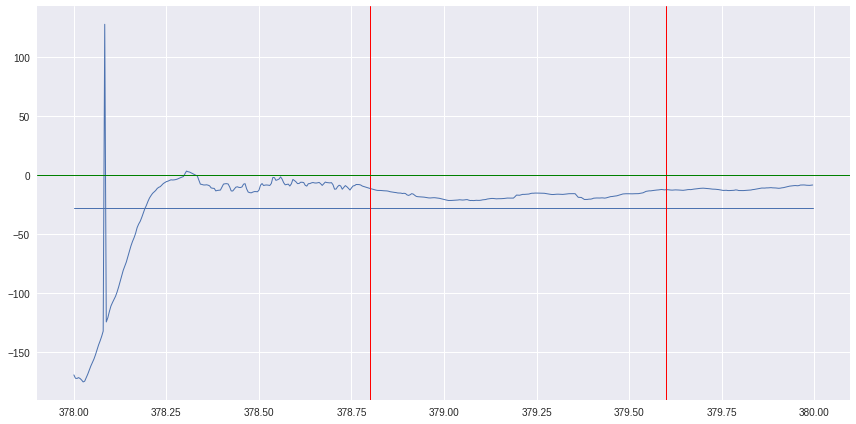

In [31]:
# 379, 380
a, b = 378, 380
xmin, xmax =  378.8, 379.6
dpart = dd1[(dd1['Time']>a) & (dd1['Time']<b)]

g = sns.FacetGrid(data=dpart, size=6, aspect=2)#, ylim=[-30,30])
g.map(plt.plot, "Time", "U", alpha=1, linewidth=1);
g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1);
g.map(plt.axvline, x=xmin, alpha=1, linewidth=1, color='red');
g.map(plt.axvline, x=xmax, alpha=1, linewidth=1, color='red');
g.map(plt.axhline, y=0, alpha=1, linewidth=1, color='green');

In [32]:
dpart1 = dd1[(dd1['Time']>xmin) & (dd1['Time']<xmax)]
dfSRB1 = pd.concat([dfSRB1, dpart1], axis=0, ignore_index=True)


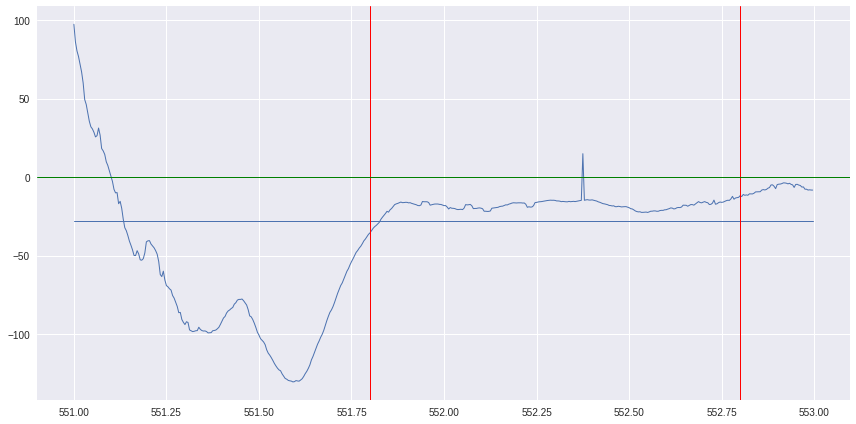

In [33]:
# 550, 553
a, b = 551, 553
xmin, xmax =  551.8, 552.8
dpart = dd1[(dd1['Time']>a) & (dd1['Time']<b)]

g = sns.FacetGrid(data=dpart, size=6, aspect=2)#, ylim=[-30,30])
g.map(plt.plot, "Time", "U", alpha=1, linewidth=1);
g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1);
g.map(plt.axvline, x=xmin, alpha=1, linewidth=1, color='red');
g.map(plt.axvline, x=xmax, alpha=1, linewidth=1, color='red');
g.map(plt.axhline, y=0, alpha=1, linewidth=1, color='green');

In [34]:
dpart1 = dd1[(dd1['Time']>xmin) & (dd1['Time']<xmax)]
dfSRB1 = pd.concat([dfSRB1, dpart1], axis=0, ignore_index=True)


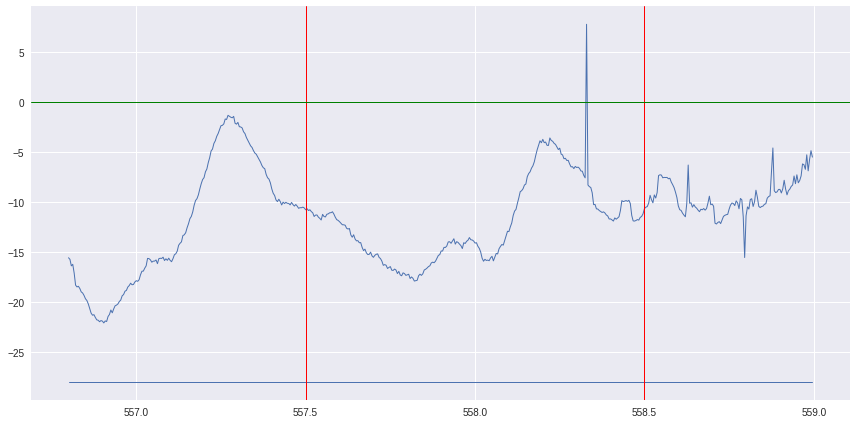

In [35]:
# 558, 560
a, b = 556.8, 559
xmin, xmax =  557.5, 558.5
dpart = dd1[(dd1['Time']>a) & (dd1['Time']<b)]

g = sns.FacetGrid(data=dpart, size=6, aspect=2)#, ylim=[-30,30])
g.map(plt.plot, "Time", "U", alpha=1, linewidth=1);
g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1);
g.map(plt.axvline, x=xmin, alpha=1, linewidth=1, color='red');
g.map(plt.axvline, x=xmax, alpha=1, linewidth=1, color='red');
g.map(plt.axhline, y=0, alpha=1, linewidth=1, color='green');

In [36]:
dpart1 = dd1[(dd1['Time']>xmin) & (dd1['Time']<xmax)]
dfSRB1 = pd.concat([dfSRB1, dpart1], axis=0, ignore_index=True)

## Experiment 2

In [37]:
dfSRB2 = pd.DataFrame()
dd2 = df[df['session_id']==2]
dd2.head(3)

,Frame,Time,X_Pos,Y_Pos,Z_Pos,X_Ori,Y_Ori,Z_Ori,session_id,Filtered,Theta,U,U_var,visible,speed
288419,21,0.087500,-0.040874,0.053695,-0.065802,-0.033493,-0.858726,-0.499283,2,1,-176.162227,75.594572,NaN,0,0.0
288420,22,0.091667,-0.040621,0.053658,-0.066332,-0.036917,-0.855100,-0.504145,2,1,-175.811833,84.087868,NaN,0,0.0
288421,23,0.095833,-0.040370,0.053624,-0.066851,-0.040665,-0.851910,-0.508258,2,1,-175.425630,92.703363,NaN,0,0.0


In [38]:
sessions[sessions['session_id']=='2']

,session_id,rat_id,date,experimenter,original_name,video_name,VRspeed
2,2,VR-3A,2017-07-13 04.27.09.355 PM,Nicholas A. Del Grosso,VRAcuityExp_2017-07-13_16-27-08_VR-3A_NIC,VRAcuityExp_2017-07-13_16-27-08_VR-3A_NIC-Came...,[ 0. 7. 14. 28.]


1. 71, 73
2. 247, 249
3. 287, 289
4. 315, 317
5. 351, 356
6. 386, 388
7. 402, 407
8. 423, 424 - rejected
9. 475, 480 - rejected
10. 591, 592
11. 596, 597, 598, 599
12. 630, 632, 633, 634

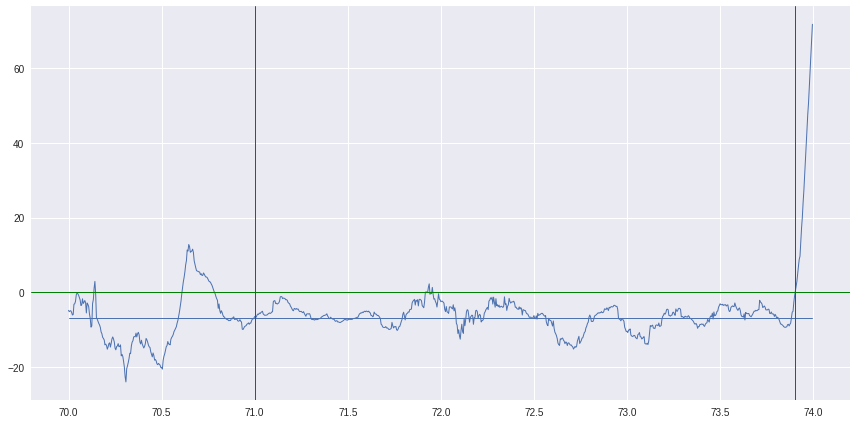

In [39]:
# 71, 73
a, b = 70, 74
xmin, xmax =  71, 73.9
dpart = dd2[(dd2['Time']>a) & (dd2['Time']<b)]

g = sns.FacetGrid(data=dpart, size=6, aspect=2)#, ylim=[-30,30])
g.map(plt.plot, "Time", "U", alpha=1, linewidth=1);
g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1);
g.map(plt.axvline, x=xmin, alpha=1, linewidth=1, color='red');
g.map(plt.axvline, x=xmax, alpha=1, linewidth=1, color='red');
g.map(plt.axhline, y=0, alpha=1, linewidth=1, color='green');

In [40]:
dpart2 = dd2[(dd2['Time']>xmin) & (dd2['Time']<xmax)]
dfSRB2 = pd.concat([dfSRB2, dpart2], axis=0, ignore_index=True)

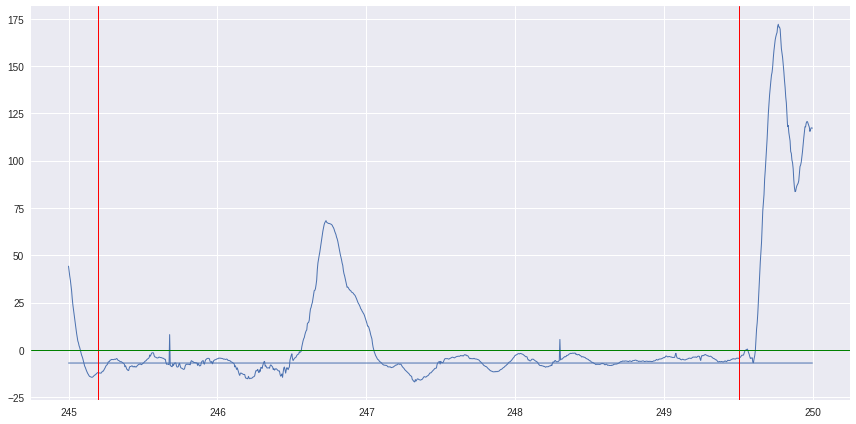

In [41]:
# 247, 249
a, b = 245, 250
xmin, xmax =  245.2, 249.5
dpart = dd2[(dd2['Time']>a) & (dd2['Time']<b)]

g = sns.FacetGrid(data=dpart, size=6, aspect=2)#, ylim=[-30,30])
g.map(plt.plot, "Time", "U", alpha=1, linewidth=1);
g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1);
g.map(plt.axvline, x=xmin, alpha=1, linewidth=1, color='red');
g.map(plt.axvline, x=xmax, alpha=1, linewidth=1, color='red');
g.map(plt.axhline, y=0, alpha=1, linewidth=1, color='green');

In [42]:
dpart2 = dd2[(dd2['Time']>xmin) & (dd2['Time']<xmax)]
dfSRB2 = pd.concat([dfSRB2, dpart2], axis=0, ignore_index=True)

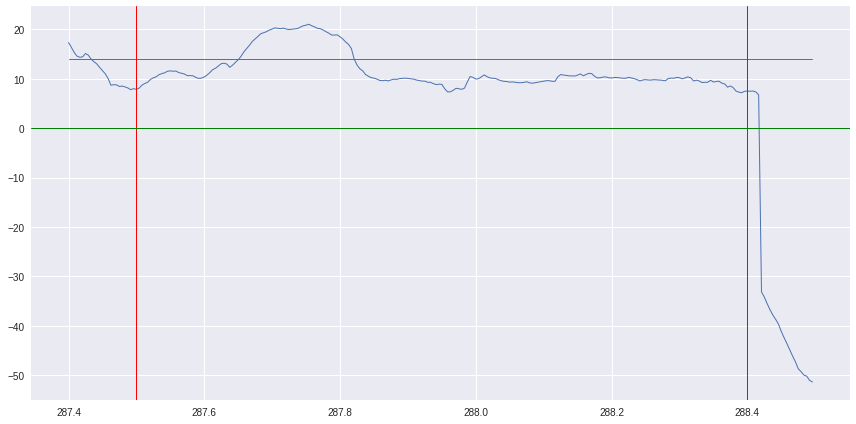

In [43]:
# 287, 289
a, b = 287.4, 288.6
xmin, xmax =  287.5, 288.4
dpart = dd2[(dd2['Time']>a) & (dd2['Time']<b)]

g = sns.FacetGrid(data=dpart, size=6, aspect=2)#, ylim=[-30,30])
g.map(plt.plot, "Time", "U", alpha=1, linewidth=1);
g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1);
g.map(plt.axvline, x=xmin, alpha=1, linewidth=1, color='red');
g.map(plt.axvline, x=xmax, alpha=1, linewidth=1, color='red');
g.map(plt.axhline, y=0, alpha=1, linewidth=1, color='green');

In [44]:
dpart2 = dd2[(dd2['Time']>xmin) & (dd2['Time']<xmax)]
dfSRB2 = pd.concat([dfSRB2, dpart2], axis=0, ignore_index=True)

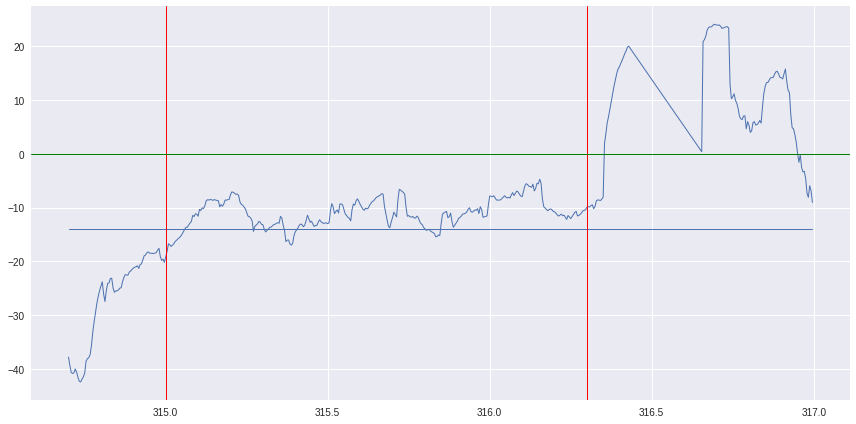

In [45]:
# 315, 317
a, b = 314.7, 317
xmin, xmax =  315, 316.3
dpart = dd2[(dd2['Time']>a) & (dd2['Time']<b)]

g = sns.FacetGrid(data=dpart, size=6, aspect=2)#, ylim=[-30,30])
g.map(plt.plot, "Time", "U", alpha=1, linewidth=1);
g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1);
g.map(plt.axvline, x=xmin, alpha=1, linewidth=1, color='red');
g.map(plt.axvline, x=xmax, alpha=1, linewidth=1, color='red');
g.map(plt.axhline, y=0, alpha=1, linewidth=1, color='green');

In [46]:
dpart2 = dd2[(dd2['Time']>xmin) & (dd2['Time']<xmax)]
dfSRB2 = pd.concat([dfSRB2, dpart2], axis=0, ignore_index=True)

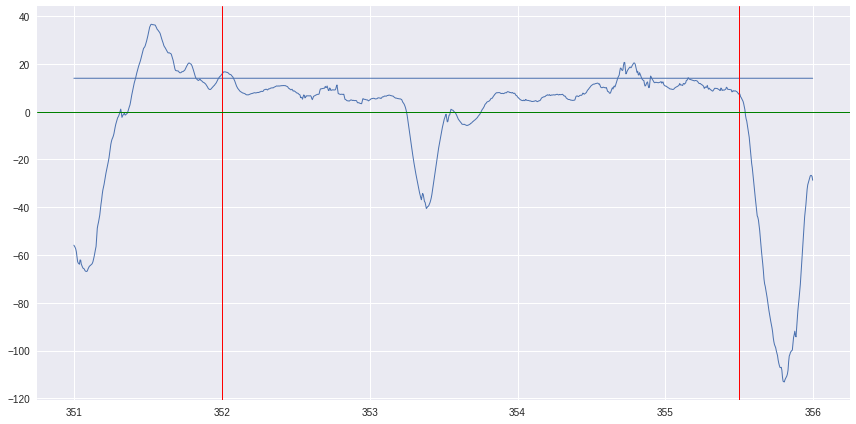

In [47]:
# 351, 356
a, b = 351, 356
xmin, xmax =  352, 355.5
dpart = dd2[(dd2['Time']>a) & (dd2['Time']<b)]

g = sns.FacetGrid(data=dpart, size=6, aspect=2)#, ylim=[-30,30])
g.map(plt.plot, "Time", "U", alpha=1, linewidth=1);
g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1);
g.map(plt.axvline, x=xmin, alpha=1, linewidth=1, color='red');
g.map(plt.axvline, x=xmax, alpha=1, linewidth=1, color='red');
g.map(plt.axhline, y=0, alpha=1, linewidth=1, color='green');

In [48]:
dpart2 = dd2[(dd2['Time']>xmin) & (dd2['Time']<xmax)]
dfSRB2 = pd.concat([dfSRB2, dpart2], axis=0, ignore_index=True)

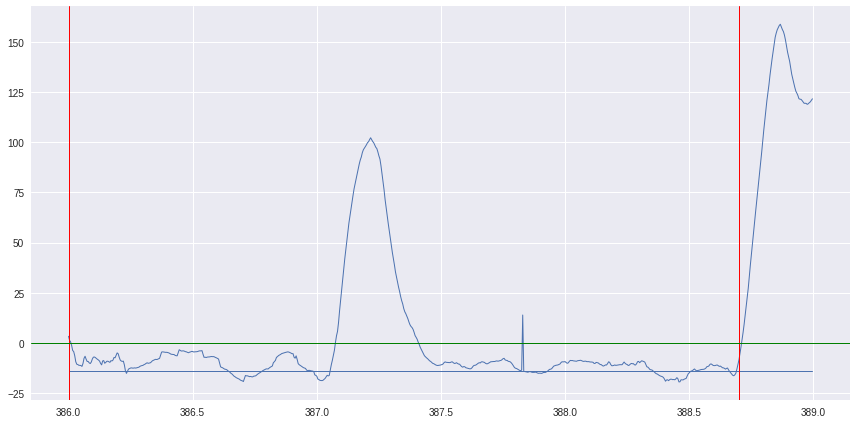

In [49]:
# 386, 388
a, b = 386, 389
xmin, xmax =  386, 388.7
dpart = dd2[(dd2['Time']>a) & (dd2['Time']<b)]

g = sns.FacetGrid(data=dpart, size=6, aspect=2)#, ylim=[-30,30])
g.map(plt.plot, "Time", "U", alpha=1, linewidth=1);
g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1);
g.map(plt.axvline, x=xmin, alpha=1, linewidth=1, color='red');
g.map(plt.axvline, x=xmax, alpha=1, linewidth=1, color='red');
g.map(plt.axhline, y=0, alpha=1, linewidth=1, color='green');

In [50]:
dpart2 = dd2[(dd2['Time']>xmin) & (dd2['Time']<xmax)]
dfSRB2 = pd.concat([dfSRB2, dpart2], axis=0, ignore_index=True)

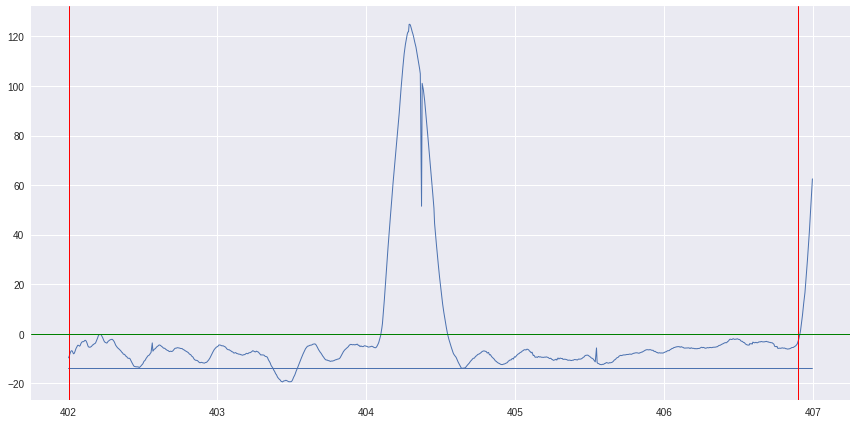

In [51]:
# 402, 407
a, b = 402, 407
xmin, xmax =  402, 406.9
dpart = dd2[(dd2['Time']>a) & (dd2['Time']<b)]

g = sns.FacetGrid(data=dpart, size=6, aspect=2)#, ylim=[-30,30])
g.map(plt.plot, "Time", "U", alpha=1, linewidth=1);
g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1);
g.map(plt.axvline, x=xmin, alpha=1, linewidth=1, color='red');
g.map(plt.axvline, x=xmax, alpha=1, linewidth=1, color='red');
g.map(plt.axhline, y=0, alpha=1, linewidth=1, color='green');

In [52]:
dpart2 = dd2[(dd2['Time']>xmin) & (dd2['Time']<xmax)]
dfSRB2 = pd.concat([dfSRB2, dpart2], axis=0, ignore_index=True)

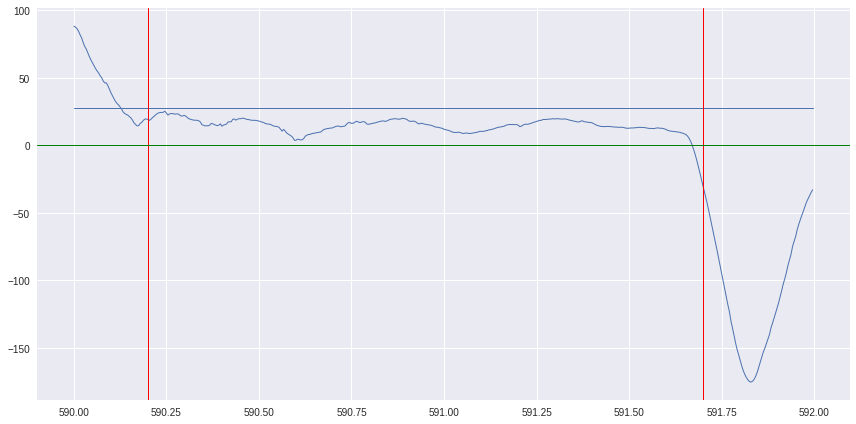

In [53]:
# 591, 592
a, b = 590, 592
xmin, xmax =  590.2, 591.7
dpart = dd2[(dd2['Time']>a) & (dd2['Time']<b)]

g = sns.FacetGrid(data=dpart, size=6, aspect=2)#, ylim=[-30,30])
g.map(plt.plot, "Time", "U", alpha=1, linewidth=1);
g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1);
g.map(plt.axvline, x=xmin, alpha=1, linewidth=1, color='red');
g.map(plt.axvline, x=xmax, alpha=1, linewidth=1, color='red');
g.map(plt.axhline, y=0, alpha=1, linewidth=1, color='green');

In [54]:
dpart2 = dd2[(dd2['Time']>xmin) & (dd2['Time']<xmax)]
dfSRB2 = pd.concat([dfSRB2, dpart2], axis=0, ignore_index=True)

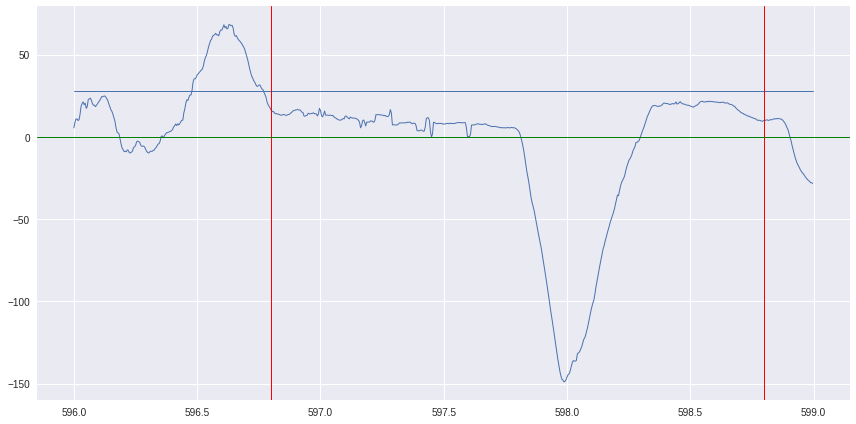

In [55]:
# 596, 599
a, b = 596, 599
xmin, xmax = 596.8, 598.8
dpart = dd2[(dd2['Time']>a) & (dd2['Time']<b)]

g = sns.FacetGrid(data=dpart, size=6, aspect=2)#, ylim=[-30,30])
g.map(plt.plot, "Time", "U", alpha=1, linewidth=1);
g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1);
g.map(plt.axvline, x=xmin, alpha=1, linewidth=1, color='red');
g.map(plt.axvline, x=xmax, alpha=1, linewidth=1, color='red');
g.map(plt.axhline, y=0, alpha=1, linewidth=1, color='green');

In [56]:
dpart2 = dd2[(dd2['Time']>xmin) & (dd2['Time']<xmax)]
dfSRB2 = pd.concat([dfSRB2, dpart2], axis=0, ignore_index=True)

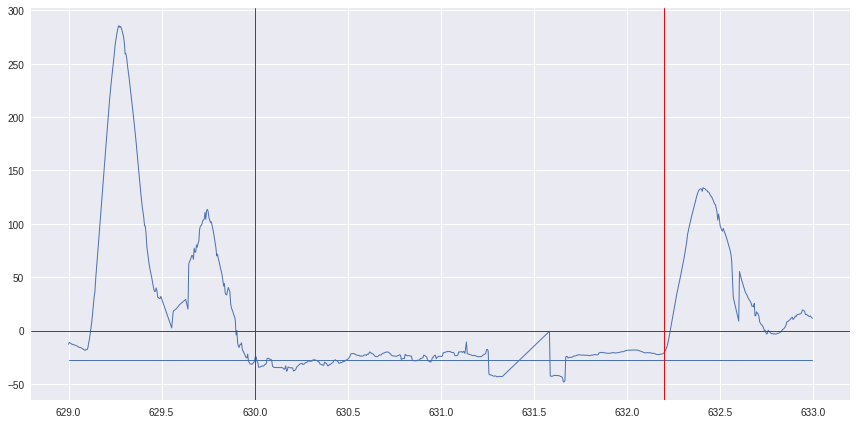

In [57]:
# 630, 634
a, b = 629, 633
xmin, xmax = 630, 632.2
dpart = dd2[(dd2['Time']>a) & (dd2['Time']<b)]

g = sns.FacetGrid(data=dpart, size=6, aspect=2)#, ylim=[-30,30])
g.map(plt.plot, "Time", "U", alpha=1, linewidth=1);
g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1);
g.map(plt.axvline, x=xmin, alpha=1, linewidth=1, color='red');
g.map(plt.axvline, x=xmax, alpha=1, linewidth=1, color='red');
g.map(plt.axhline, y=0, alpha=1, linewidth=1, color='green');

In [58]:
dpart2 = dd2[(dd2['Time']>xmin) & (dd2['Time']<xmax)]
dfSRB2 = pd.concat([dfSRB2, dpart2], axis=0, ignore_index=True)

## Experiment 3

In [59]:
dfSRB3 = pd.DataFrame()
dd3 = df[df['session_id']==3]
dd3.head(3)

,Frame,Time,X_Pos,Y_Pos,Z_Pos,X_Ori,Y_Ori,Z_Ori,session_id,Filtered,Theta,U,U_var,visible,speed
462907,21,0.087500,-0.082320,0.055258,-0.038330,-0.765656,-0.614830,-0.102741,3,1,-97.642712,-133.473506,NaN,0,0.0
462908,22,0.091667,-0.082128,0.055655,-0.038356,-0.769377,-0.605529,-0.110960,3,1,-98.206664,-135.337793,NaN,0,0.0
462909,23,0.095833,-0.081929,0.056079,-0.038389,-0.773341,-0.595462,-0.119123,3,1,-98.756799,-132.053379,NaN,0,0.0


In [60]:
sessions[sessions['session_id']=='3']

,session_id,rat_id,date,experimenter,original_name,video_name,VRspeed
3,3,VR-4A,2017-07-13 02.39.20.315 PM,Nicholas A. Del Grosso,VRAcuityExp_2017-07-13_14-39-17_VR-4A_NIC,VRAcuityExp_2017-07-13_14-39-17_VR-4A_NIC-Came...,[ 0. 7. 14. 28.]


1. 65, 66
2. 227, 228
3. 238, 240
4. 342, 345

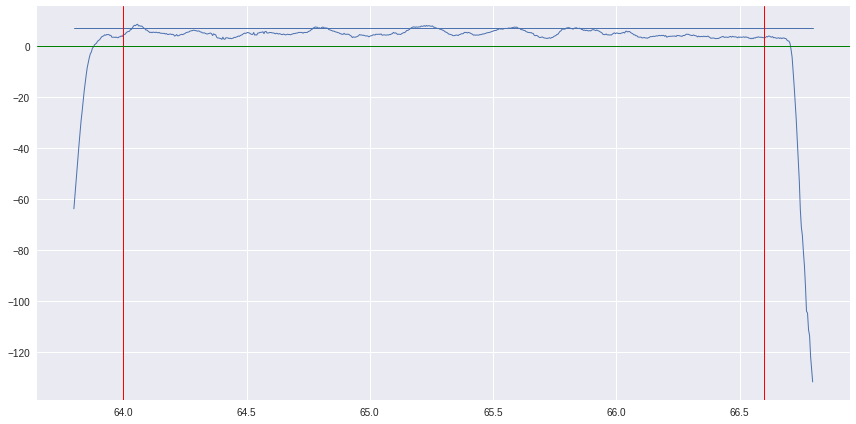

In [61]:
# 65, 66
a, b = 63.8, 66.8
xmin, xmax = 64, 66.6
dpart = dd3[(dd3['Time']>a) & (dd3['Time']<b)]

g = sns.FacetGrid(data=dpart, size=6, aspect=2)#, ylim=[-30,30])
g.map(plt.plot, "Time", "U", alpha=1, linewidth=1);
g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1);
g.map(plt.axvline, x=xmin, alpha=1, linewidth=1, color='red');
g.map(plt.axvline, x=xmax, alpha=1, linewidth=1, color='red');
g.map(plt.axhline, y=0, alpha=1, linewidth=1, color='green');

In [62]:
dpart3 = dd3[(dd3['Time']>xmin) & (dd3['Time']<xmax)]
dfSRB3 = pd.concat([dfSRB3, dpart3], axis=0, ignore_index=True)

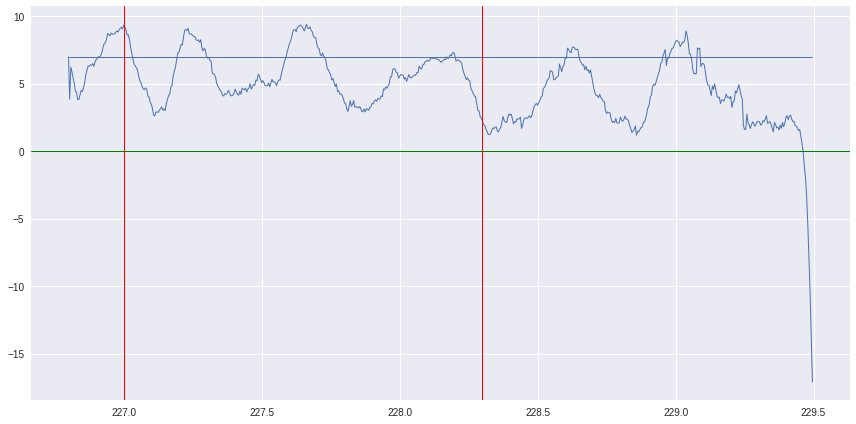

In [63]:
# 227, 228
a, b = 226.8, 229.5
xmin, xmax = 227, 228.3
dpart = dd3[(dd3['Time']>a) & (dd3['Time']<b)]

g = sns.FacetGrid(data=dpart, size=6, aspect=2)#, ylim=[-30,30])
g.map(plt.plot, "Time", "U", alpha=1, linewidth=1);
g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1);
g.map(plt.axvline, x=xmin, alpha=1, linewidth=1, color='red');
g.map(plt.axvline, x=xmax, alpha=1, linewidth=1, color='red');
g.map(plt.axhline, y=0, alpha=1, linewidth=1, color='green');

In [64]:
dpart3 = dd3[(dd3['Time']>xmin) & (dd3['Time']<xmax)]
dfSRB3 = pd.concat([dfSRB3, dpart3], axis=0, ignore_index=True)

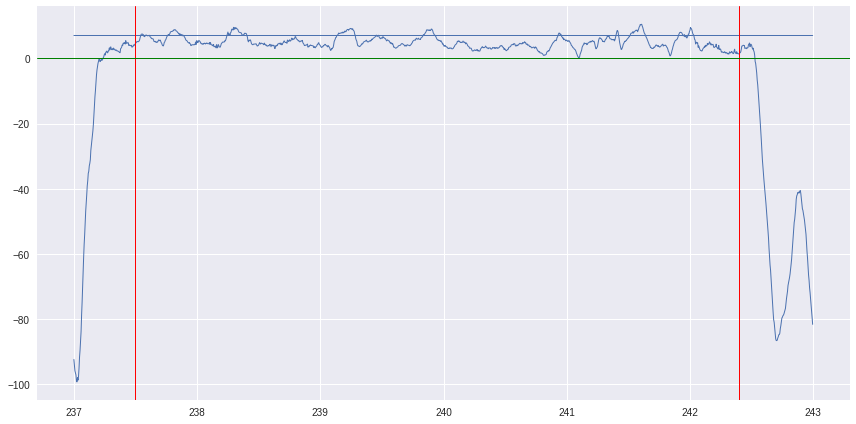

In [65]:
# 238, 240
a, b = 237, 243
xmin, xmax = 237.5, 242.4
dpart = dd3[(dd3['Time']>a) & (dd3['Time']<b)]

g = sns.FacetGrid(data=dpart, size=6, aspect=2)#, ylim=[-30,30])
g.map(plt.plot, "Time", "U", alpha=1, linewidth=1);
g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1);
g.map(plt.axvline, x=xmin, alpha=1, linewidth=1, color='red');
g.map(plt.axvline, x=xmax, alpha=1, linewidth=1, color='red');
g.map(plt.axhline, y=0, alpha=1, linewidth=1, color='green');

In [66]:
dpart3 = dd3[(dd3['Time']>xmin) & (dd3['Time']<xmax)]
dfSRB3 = pd.concat([dfSRB3, dpart3], axis=0, ignore_index=True)

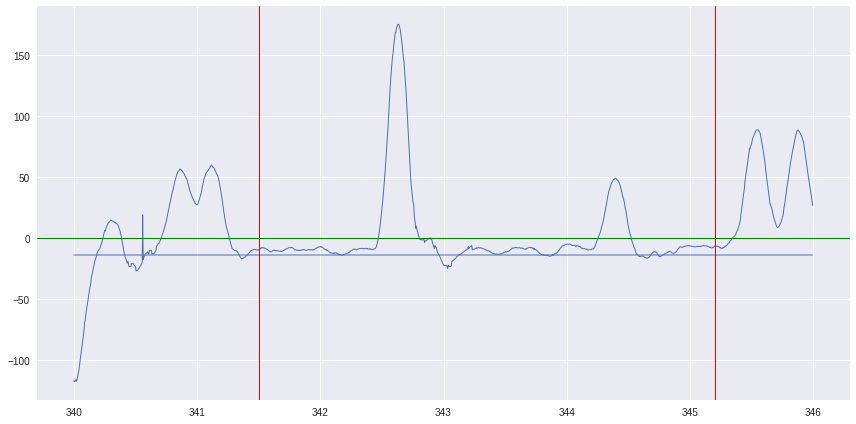

In [67]:
# 342, 345
a, b = 340, 346
xmin, xmax = 341.5, 345.2
dpart = dd3[(dd3['Time']>a) & (dd3['Time']<b)]

g = sns.FacetGrid(data=dpart, size=6, aspect=2)#, ylim=[-30,30])
g.map(plt.plot, "Time", "U", alpha=1, linewidth=1);
g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1);
g.map(plt.axvline, x=xmin, alpha=1, linewidth=1, color='red');
g.map(plt.axvline, x=xmax, alpha=1, linewidth=1, color='red');
g.map(plt.axhline, y=0, alpha=1, linewidth=1, color='green');

In [68]:
dpart3 = dd3[(dd3['Time']>xmin) & (dd3['Time']<xmax)]
dfSRB3 = pd.concat([dfSRB3, dpart3], axis=0, ignore_index=True)

## Experiment 4

In [69]:
dfSRB4 = pd.DataFrame()
dd4 = df[df['session_id']==4]
dd4.head(4)

,Frame,Time,X_Pos,Y_Pos,Z_Pos,X_Ori,Y_Ori,Z_Ori,session_id,Filtered,Theta,U,U_var,visible,speed
697076,21,0.087500,0.025756,0.260720,0.070537,0.428983,0.544869,0.719620,4,1,30.800205,-4.915846,NaN,0,0.0
697077,22,0.091667,0.025878,0.261271,0.070502,0.428396,0.546296,0.718892,4,1,30.791220,-2.156416,NaN,0,0.0
697078,23,0.095833,0.026002,0.261827,0.070465,0.427933,0.547941,0.717907,4,1,30.798508,1.749524,NaN,0,0.0
697079,24,0.100000,0.026132,0.262384,0.070423,0.427577,0.549703,0.716734,4,1,30.818733,4.853459,NaN,0,0.0


In [70]:
sessions[sessions['session_id']=='4']

,session_id,rat_id,date,experimenter,original_name,video_name,VRspeed
4,4,VR-2A,2017-07-13 03.19.28.235 PM,Eduardo Blanco-Hernandez,VRAcuityExp_2017-07-13_15-19-09_VR-2A_EDU,VRAcuityExp_2017-07-13_15-19-09_VR-2A_EDU-Came...,[ 0. 7. 14. 28.]


1. 181, 183
2. 184, 185
3. 221, 228
4. 267, 270
5. 287, 291

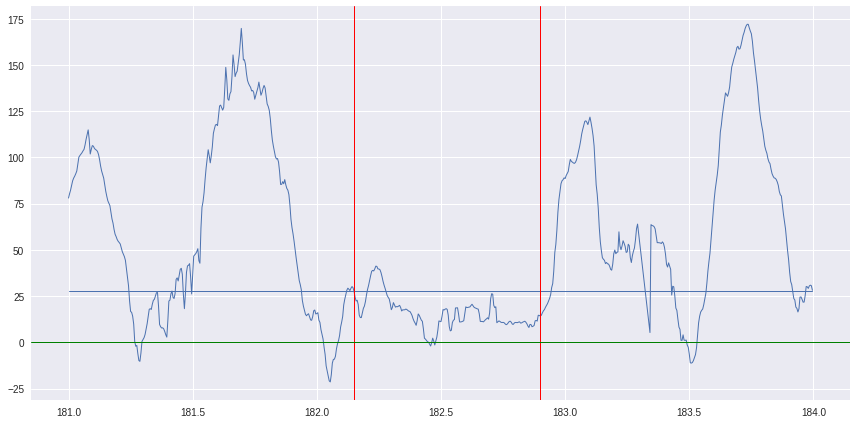

In [71]:
# 181, 183
a, b = 181, 184
xmin, xmax = 182.15, 182.9
dpart = dd4[(dd4['Time']>a) & (dd4['Time']<b)]

g = sns.FacetGrid(data=dpart, size=6, aspect=2)#, ylim=[-30,30])
g.map(plt.plot, "Time", "U", alpha=1, linewidth=1);
g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1);
g.map(plt.axvline, x=xmin, alpha=1, linewidth=1, color='red');
g.map(plt.axvline, x=xmax, alpha=1, linewidth=1, color='red');
g.map(plt.axhline, y=0, alpha=1, linewidth=1, color='green');

In [72]:
dpart4 = dd4[(dd4['Time']>xmin) & (dd4['Time']<xmax)]
dfSRB4 = pd.concat([dfSRB4, dpart4], axis=0, ignore_index=True)

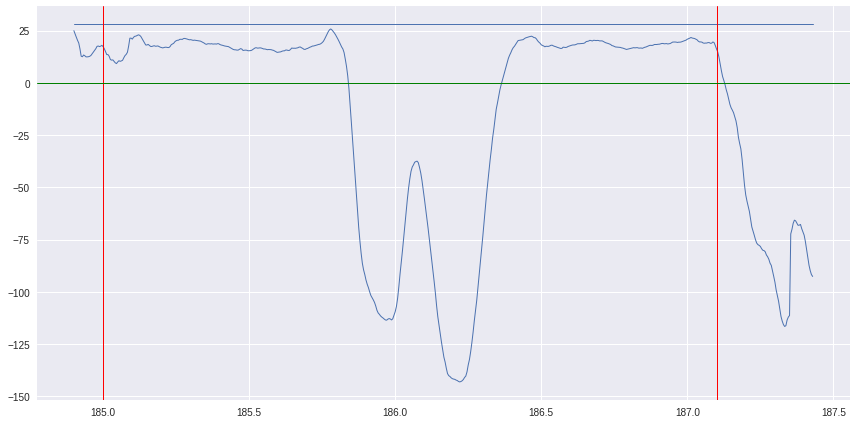

In [73]:
# 184, 185
a, b = 184.9, 187.5
xmin, xmax = 185, 187.1
dpart = dd4[(dd4['Time']>a) & (dd4['Time']<b)]

g = sns.FacetGrid(data=dpart, size=6, aspect=2)#, ylim=[-30,30])
g.map(plt.plot, "Time", "U", alpha=1, linewidth=1);
g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1);
g.map(plt.axvline, x=xmin, alpha=1, linewidth=1, color='red');
g.map(plt.axvline, x=xmax, alpha=1, linewidth=1, color='red');
g.map(plt.axhline, y=0, alpha=1, linewidth=1, color='green');

In [74]:
dpart4 = dd4[(dd4['Time']>xmin) & (dd4['Time']<xmax)]
dfSRB4 = pd.concat([dfSRB4, dpart4], axis=0, ignore_index=True)

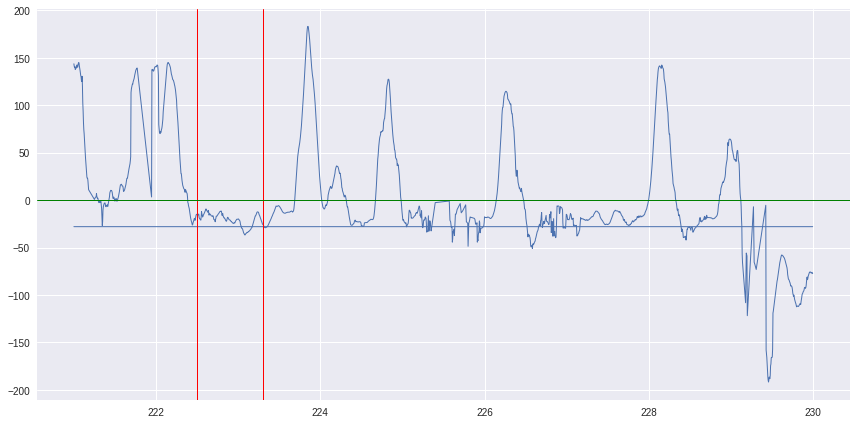

In [75]:
# 221, 228
a, b = 221, 230
xmin, xmax = 222.5, 223.3
dpart = dd4[(dd4['Time']>a) & (dd4['Time']<b)]

g = sns.FacetGrid(data=dpart, size=6, aspect=2)#, ylim=[-30,30])
g.map(plt.plot, "Time", "U", alpha=1, linewidth=1);
g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1);
g.map(plt.axvline, x=xmin, alpha=1, linewidth=1, color='red');
g.map(plt.axvline, x=xmax, alpha=1, linewidth=1, color='red');
g.map(plt.axhline, y=0, alpha=1, linewidth=1, color='green');

In [76]:
dpart4 = dd4[(dd4['Time']>xmin) & (dd4['Time']<xmax)]
dfSRB4 = pd.concat([dfSRB4, dpart4], axis=0, ignore_index=True)

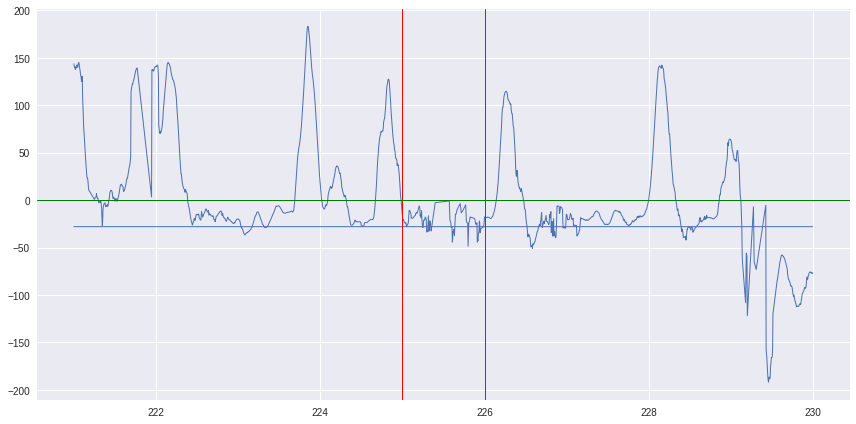

In [77]:
# 221, 228
a, b = 221, 230
xmin, xmax = 225, 226
dpart = dd4[(dd4['Time']>a) & (dd4['Time']<b)]

g = sns.FacetGrid(data=dpart, size=6, aspect=2)#, ylim=[-30,30])
g.map(plt.plot, "Time", "U", alpha=1, linewidth=1);
g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1);
g.map(plt.axvline, x=xmin, alpha=1, linewidth=1, color='red');
g.map(plt.axvline, x=xmax, alpha=1, linewidth=1, color='red');
g.map(plt.axhline, y=0, alpha=1, linewidth=1, color='green');

In [78]:
dpart4 = dd4[(dd4['Time']>xmin) & (dd4['Time']<xmax)]
dfSRB4 = pd.concat([dfSRB4, dpart4], axis=0, ignore_index=True)

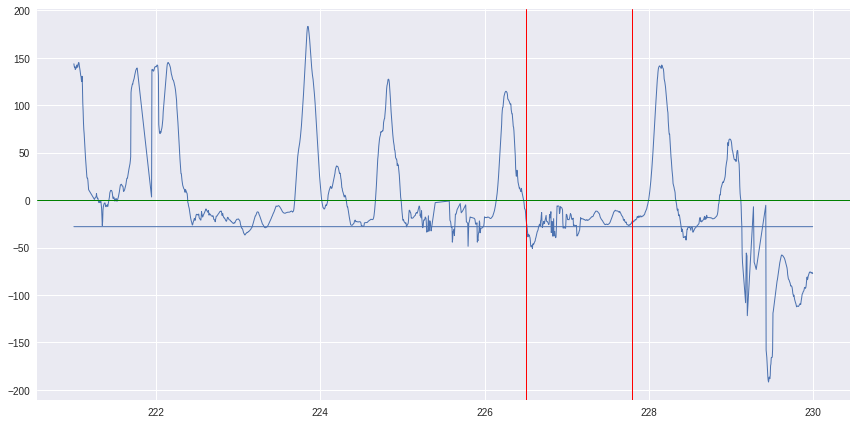

In [79]:
# 221, 228
a, b = 221, 230
xmin, xmax = 226.5, 227.8
dpart = dd4[(dd4['Time']>a) & (dd4['Time']<b)]

g = sns.FacetGrid(data=dpart, size=6, aspect=2)#, ylim=[-30,30])
g.map(plt.plot, "Time", "U", alpha=1, linewidth=1);
g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1);
g.map(plt.axvline, x=xmin, alpha=1, linewidth=1, color='red');
g.map(plt.axvline, x=xmax, alpha=1, linewidth=1, color='red');
g.map(plt.axhline, y=0, alpha=1, linewidth=1, color='green');

In [80]:
dpart4 = dd4[(dd4['Time']>xmin) & (dd4['Time']<xmax)]
dfSRB4 = pd.concat([dfSRB4, dpart4], axis=0, ignore_index=True)

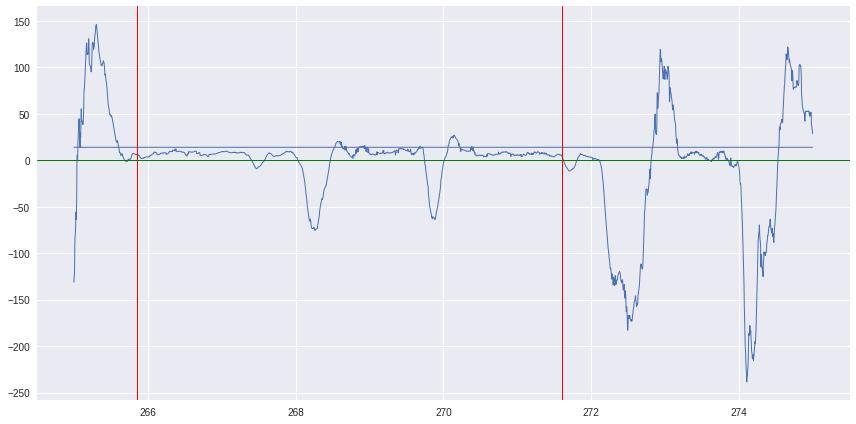

In [81]:
# 267, 270
a, b = 265, 275
xmin, xmax = 265.85, 271.6
dpart = dd4[(dd4['Time']>a) & (dd4['Time']<b)]

g = sns.FacetGrid(data=dpart, size=6, aspect=2)#, ylim=[-30,30])
g.map(plt.plot, "Time", "U", alpha=1, linewidth=1);
g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1);
g.map(plt.axvline, x=xmin, alpha=1, linewidth=1, color='red');
g.map(plt.axvline, x=xmax, alpha=1, linewidth=1, color='red');
g.map(plt.axhline, y=0, alpha=1, linewidth=1, color='green');

In [82]:
dpart4 = dd4[(dd4['Time']>xmin) & (dd4['Time']<xmax)]
dfSRB4 = pd.concat([dfSRB4, dpart4], axis=0, ignore_index=True)

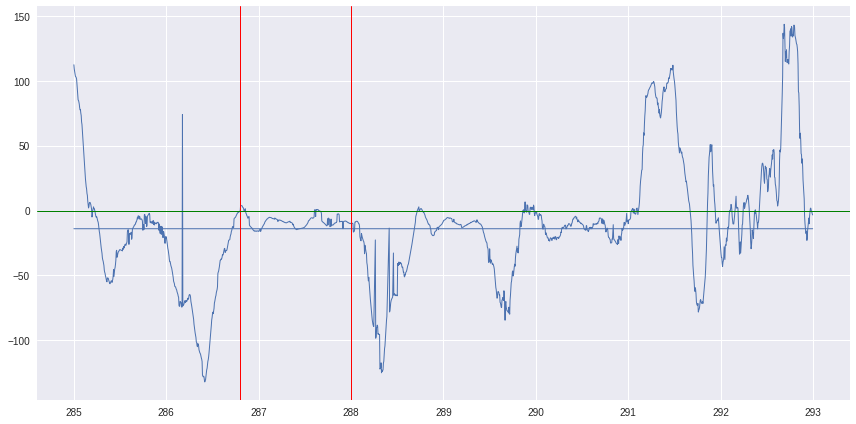

In [83]:
# 287, 291
a, b = 285, 293
xmin, xmax = 286.8, 288
dpart = dd4[(dd4['Time']>a) & (dd4['Time']<b)]

g = sns.FacetGrid(data=dpart, size=6, aspect=2)#, ylim=[-30,30])
g.map(plt.plot, "Time", "U", alpha=1, linewidth=1);
g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1);
g.map(plt.axvline, x=xmin, alpha=1, linewidth=1, color='red');
g.map(plt.axvline, x=xmax, alpha=1, linewidth=1, color='red');
g.map(plt.axhline, y=0, alpha=1, linewidth=1, color='green');

In [84]:
dpart4 = dd4[(dd4['Time']>xmin) & (dd4['Time']<xmax)]
dfSRB4 = pd.concat([dfSRB4, dpart4], axis=0, ignore_index=True)

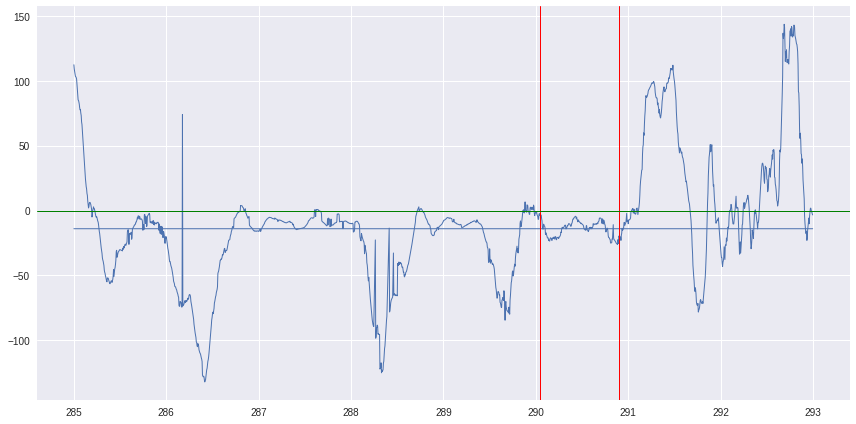

In [85]:
# 287, 291
a, b = 285, 293
xmin, xmax = 290.05, 290.9
dpart = dd4[(dd4['Time']>a) & (dd4['Time']<b)]

g = sns.FacetGrid(data=dpart, size=6, aspect=2)#, ylim=[-30,30])
g.map(plt.plot, "Time", "U", alpha=1, linewidth=1);
g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1);
g.map(plt.axvline, x=xmin, alpha=1, linewidth=1, color='red');
g.map(plt.axvline, x=xmax, alpha=1, linewidth=1, color='red');
g.map(plt.axhline, y=0, alpha=1, linewidth=1, color='green');

In [86]:
dpart4 = dd4[(dd4['Time']>xmin) & (dd4['Time']<xmax)]
dfSRB4 = pd.concat([dfSRB4, dpart4], axis=0, ignore_index=True)

## Experiment 5

In [87]:
dfSRB5 = pd.DataFrame()
dd5 = df[df['session_id']==5]
dd5.head(4)

,Frame,Time,X_Pos,Y_Pos,Z_Pos,X_Ori,Y_Ori,Z_Ori,session_id,Filtered,Theta,U,U_var,visible,speed
843329,21,0.087500,0.084060,0.210095,-0.055029,0.987685,0.127779,0.081317,5,1,85.293426,-28.158944,NaN,0,0.0
843330,22,0.091667,0.084170,0.209837,-0.054886,0.987284,0.129817,0.083348,5,1,85.174460,-28.549704,NaN,0,0.0
843331,23,0.095833,0.084267,0.209588,-0.054741,0.986874,0.131898,0.085275,5,1,85.061387,-27.141888,NaN,0,0.0
843332,24,0.100000,0.084359,0.209351,-0.054594,0.986434,0.134268,0.087170,5,1,84.949957,-26.741038,NaN,0,0.0


In [88]:
sessions[sessions['session_id']=='5']

,session_id,rat_id,date,experimenter,original_name,video_name,VRspeed
5,5,VR-1B,2017-07-13 03.53.42.156 PM,Nicholas A. Del Grosso,VRAcuityExp_2017-07-13_15-53-40_VR-1B_NIC,VRAcuityExp_2017-07-13_15-53-40_VR-1B_NIC-Came...,[ 0. 7. 14. 28.]


1. 99, 104
2. 155, 157
3. 232, 233
4. 275, 285
5. 309, 311
6. 316, 317
7. 320, 322
8. 323, 325
9. 326, 327
10. 355, 365
11. 630, 631
12. 637, 645  -- rejected

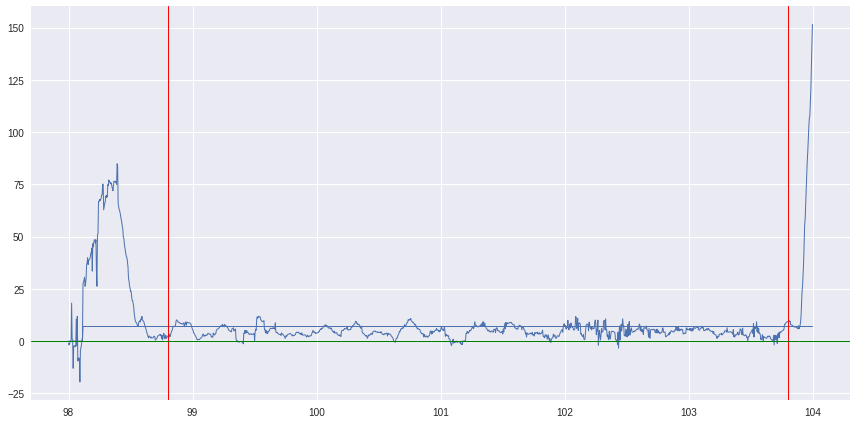

In [89]:
# 99, 104
a, b = 98, 104
xmin, xmax = 98.8, 103.8
dpart = dd5[(dd5['Time']>a) & (dd5['Time']<b)]

g = sns.FacetGrid(data=dpart, size=6, aspect=2)#, ylim=[-30,30])
g.map(plt.plot, "Time", "U", alpha=1, linewidth=1);
g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1);
g.map(plt.axvline, x=xmin, alpha=1, linewidth=1, color='red');
g.map(plt.axvline, x=xmax, alpha=1, linewidth=1, color='red');
g.map(plt.axhline, y=0, alpha=1, linewidth=1, color='green');

In [90]:
dpart5 = dd5[(dd5['Time']>xmin) & (dd5['Time']<xmax)]
dfSRB5 = pd.concat([dfSRB5, dpart5], axis=0, ignore_index=True)

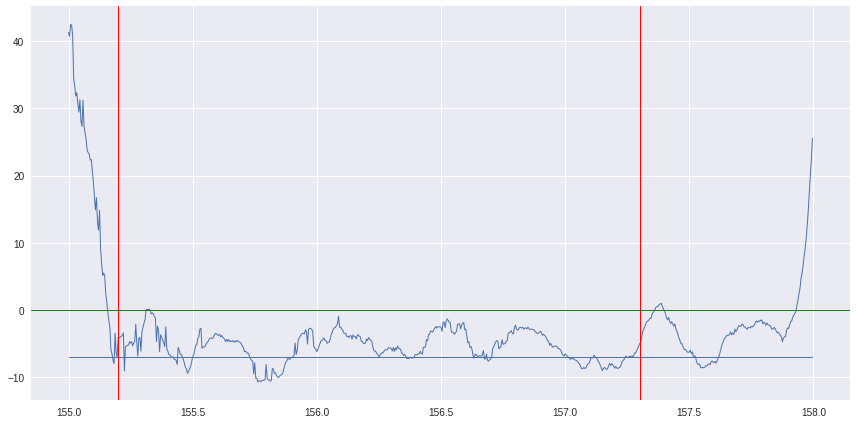

In [91]:
# 155, 157
a, b = 155, 158
xmin, xmax = 155.2, 157.3
dpart = dd5[(dd5['Time']>a) & (dd5['Time']<b)]

g = sns.FacetGrid(data=dpart, size=6, aspect=2)#, ylim=[-30,30])
g.map(plt.plot, "Time", "U", alpha=1, linewidth=1);
g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1);
g.map(plt.axvline, x=xmin, alpha=1, linewidth=1, color='red');
g.map(plt.axvline, x=xmax, alpha=1, linewidth=1, color='red');
g.map(plt.axhline, y=0, alpha=1, linewidth=1, color='green');

In [92]:
dpart5 = dd5[(dd5['Time']>xmin) & (dd5['Time']<xmax)]
dfSRB5 = pd.concat([dfSRB5, dpart5], axis=0, ignore_index=True)

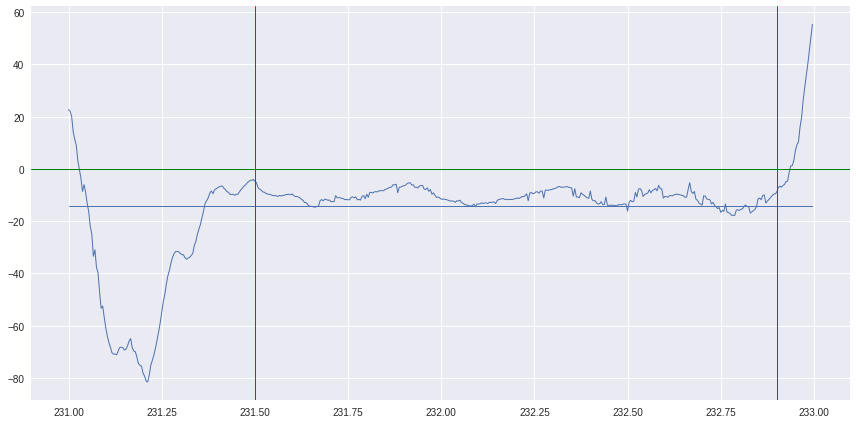

In [93]:
# 232, 233
a, b = 231, 233
xmin, xmax = 231.5, 232.9
dpart = dd5[(dd5['Time']>a) & (dd5['Time']<b)]

g = sns.FacetGrid(data=dpart, size=6, aspect=2)#, ylim=[-30,30])
g.map(plt.plot, "Time", "U", alpha=1, linewidth=1);
g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1);
g.map(plt.axvline, x=xmin, alpha=1, linewidth=1, color='red');
g.map(plt.axvline, x=xmax, alpha=1, linewidth=1, color='red');
g.map(plt.axhline, y=0, alpha=1, linewidth=1, color='green');

In [94]:
dpart5 = dd5[(dd5['Time']>xmin) & (dd5['Time']<xmax)]
dfSRB5 = pd.concat([dfSRB5, dpart5], axis=0, ignore_index=True)

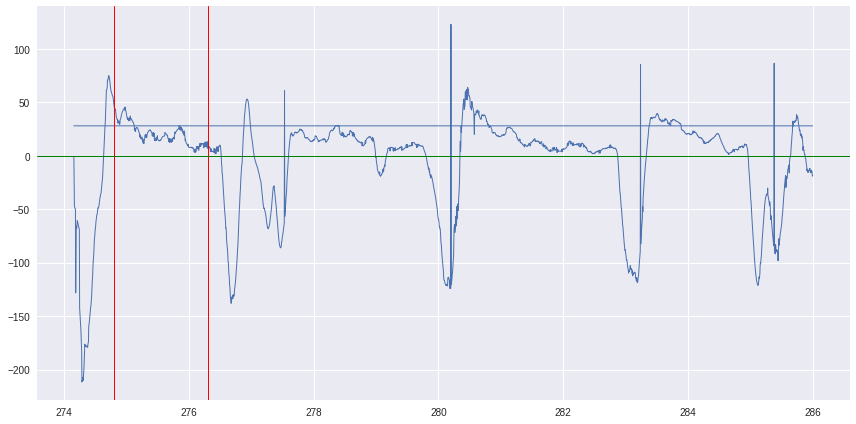

In [95]:
# 275, 285
a, b = 274, 286
xmin, xmax = 274.8, 276.3
dpart = dd5[(dd5['Time']>a) & (dd5['Time']<b)]

g = sns.FacetGrid(data=dpart, size=6, aspect=2)#, ylim=[-30,30])
g.map(plt.plot, "Time", "U", alpha=1, linewidth=1);
g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1);
g.map(plt.axvline, x=xmin, alpha=1, linewidth=1, color='red');
g.map(plt.axvline, x=xmax, alpha=1, linewidth=1, color='red');
g.map(plt.axhline, y=0, alpha=1, linewidth=1, color='green');

In [96]:
dpart5 = dd5[(dd5['Time']>xmin) & (dd5['Time']<xmax)]
dfSRB5 = pd.concat([dfSRB5, dpart5], axis=0, ignore_index=True)

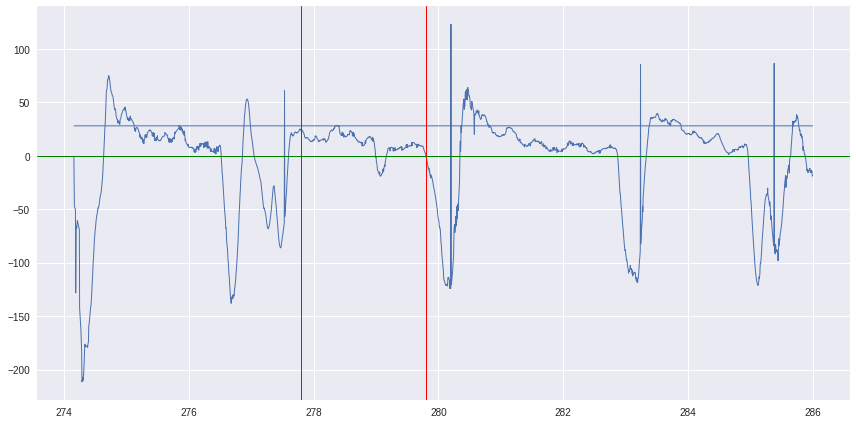

In [97]:
# 275, 285
a, b = 274, 286
xmin, xmax = 277.8, 279.8
dpart = dd5[(dd5['Time']>a) & (dd5['Time']<b)]

g = sns.FacetGrid(data=dpart, size=6, aspect=2)#, ylim=[-30,30])
g.map(plt.plot, "Time", "U", alpha=1, linewidth=1);
g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1);
g.map(plt.axvline, x=xmin, alpha=1, linewidth=1, color='red');
g.map(plt.axvline, x=xmax, alpha=1, linewidth=1, color='red');
g.map(plt.axhline, y=0, alpha=1, linewidth=1, color='green');

In [98]:
dpart5 = dd5[(dd5['Time']>xmin) & (dd5['Time']<xmax)]
dfSRB5 = pd.concat([dfSRB5, dpart5], axis=0, ignore_index=True)

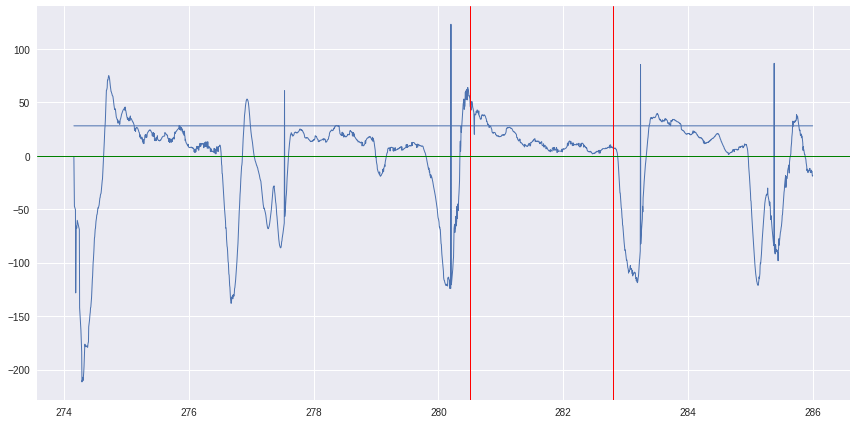

In [99]:
# 275, 285
a, b = 274, 286
xmin, xmax = 280.5, 282.8
dpart = dd5[(dd5['Time']>a) & (dd5['Time']<b)]

g = sns.FacetGrid(data=dpart, size=6, aspect=2)#, ylim=[-30,30])
g.map(plt.plot, "Time", "U", alpha=1, linewidth=1);
g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1);
g.map(plt.axvline, x=xmin, alpha=1, linewidth=1, color='red');
g.map(plt.axvline, x=xmax, alpha=1, linewidth=1, color='red');
g.map(plt.axhline, y=0, alpha=1, linewidth=1, color='green');

In [100]:
dpart5 = dd5[(dd5['Time']>xmin) & (dd5['Time']<xmax)]
dfSRB5 = pd.concat([dfSRB5, dpart5], axis=0, ignore_index=True)

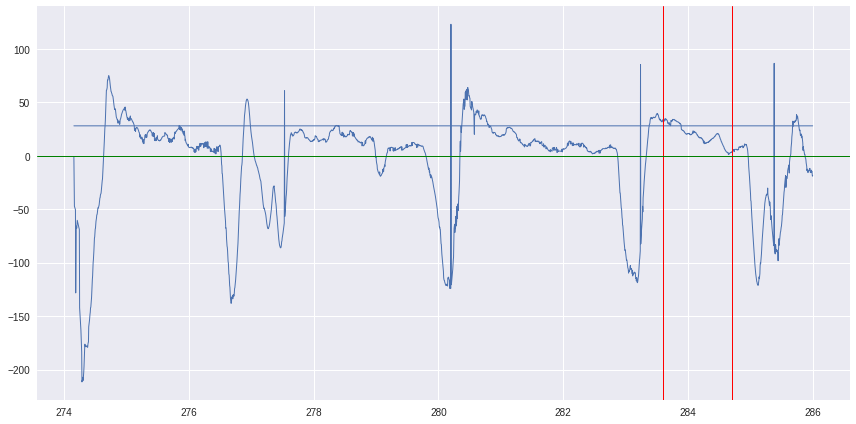

In [101]:
# 275, 285
a, b = 274, 286
xmin, xmax = 283.6, 284.7
dpart = dd5[(dd5['Time']>a) & (dd5['Time']<b)]

g = sns.FacetGrid(data=dpart, size=6, aspect=2)#, ylim=[-30,30])
g.map(plt.plot, "Time", "U", alpha=1, linewidth=1);
g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1);
g.map(plt.axvline, x=xmin, alpha=1, linewidth=1, color='red');
g.map(plt.axvline, x=xmax, alpha=1, linewidth=1, color='red');
g.map(plt.axhline, y=0, alpha=1, linewidth=1, color='green');

In [102]:
dpart5 = dd5[(dd5['Time']>xmin) & (dd5['Time']<xmax)]
dfSRB5 = pd.concat([dfSRB5, dpart5], axis=0, ignore_index=True)

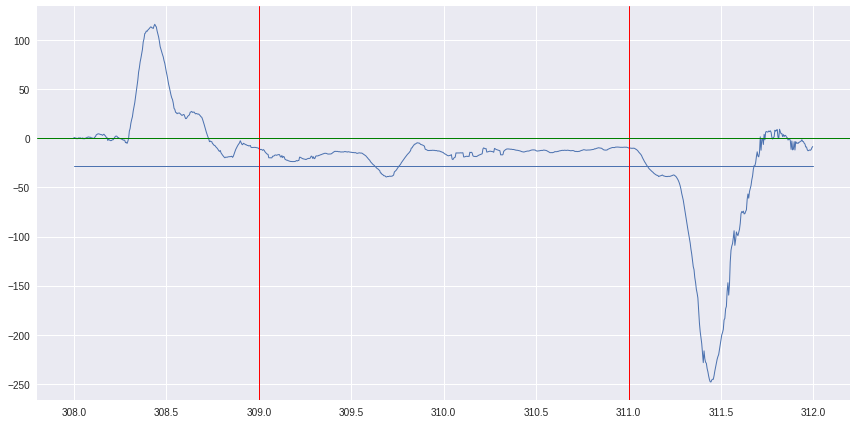

In [103]:
# 309, 311
a, b = 308, 312
xmin, xmax = 309, 311
dpart = dd5[(dd5['Time']>a) & (dd5['Time']<b)]

g = sns.FacetGrid(data=dpart, size=6, aspect=2)#, ylim=[-30,30])
g.map(plt.plot, "Time", "U", alpha=1, linewidth=1);
g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1);
g.map(plt.axvline, x=xmin, alpha=1, linewidth=1, color='red');
g.map(plt.axvline, x=xmax, alpha=1, linewidth=1, color='red');
g.map(plt.axhline, y=0, alpha=1, linewidth=1, color='green');

In [104]:
dpart5 = dd5[(dd5['Time']>xmin) & (dd5['Time']<xmax)]
dfSRB5 = pd.concat([dfSRB5, dpart5], axis=0, ignore_index=True)

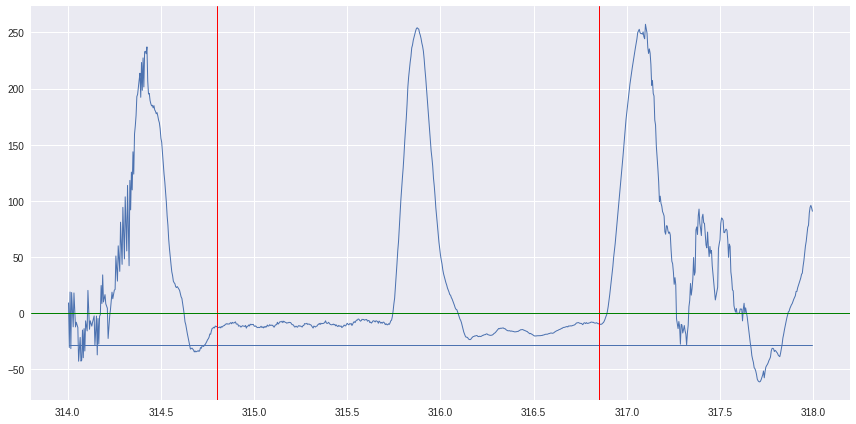

In [105]:
# 316, 317
a, b = 314, 318
xmin, xmax = 314.8, 316.85
dpart = dd5[(dd5['Time']>a) & (dd5['Time']<b)]

g = sns.FacetGrid(data=dpart, size=6, aspect=2)#, ylim=[-30,30])
g.map(plt.plot, "Time", "U", alpha=1, linewidth=1);
g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1);
g.map(plt.axvline, x=xmin, alpha=1, linewidth=1, color='red');
g.map(plt.axvline, x=xmax, alpha=1, linewidth=1, color='red');
g.map(plt.axhline, y=0, alpha=1, linewidth=1, color='green');

In [106]:
dpart5 = dd5[(dd5['Time']>xmin) & (dd5['Time']<xmax)]
dfSRB5 = pd.concat([dfSRB5, dpart5], axis=0, ignore_index=True)

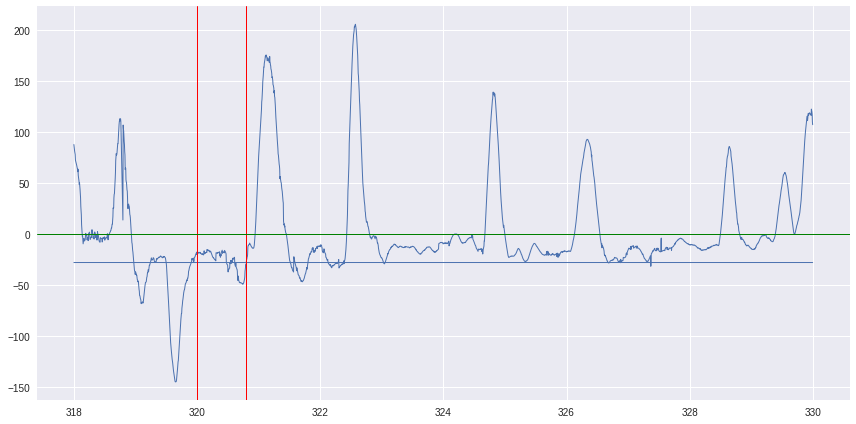

In [107]:
# 320, 325
a, b = 318, 330
xmin, xmax = 320, 320.8
dpart = dd5[(dd5['Time']>a) & (dd5['Time']<b)]

g = sns.FacetGrid(data=dpart, size=6, aspect=2)#, ylim=[-30,30])
g.map(plt.plot, "Time", "U", alpha=1, linewidth=1);
g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1);
g.map(plt.axvline, x=xmin, alpha=1, linewidth=1, color='red');
g.map(plt.axvline, x=xmax, alpha=1, linewidth=1, color='red');
g.map(plt.axhline, y=0, alpha=1, linewidth=1, color='green');

In [108]:
dpart5 = dd5[(dd5['Time']>xmin) & (dd5['Time']<xmax)]
dfSRB5 = pd.concat([dfSRB5, dpart5], axis=0, ignore_index=True)

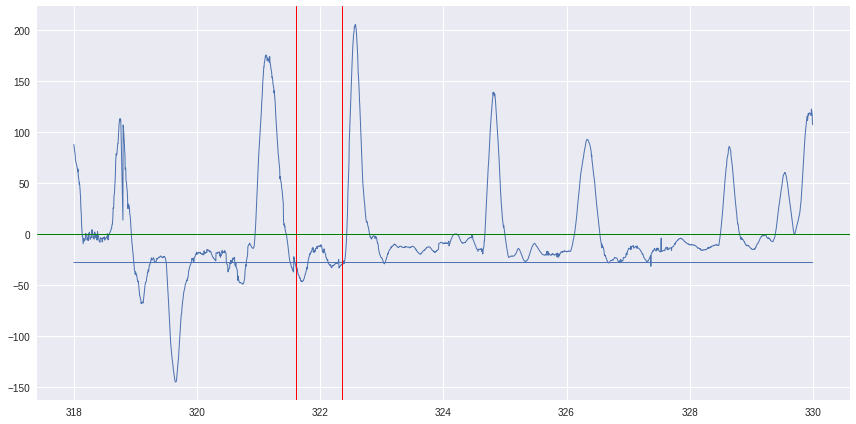

In [109]:
# 320, 325
a, b = 318, 330
xmin, xmax = 321.6, 322.35
dpart = dd5[(dd5['Time']>a) & (dd5['Time']<b)]

g = sns.FacetGrid(data=dpart, size=6, aspect=2)#, ylim=[-30,30])
g.map(plt.plot, "Time", "U", alpha=1, linewidth=1);
g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1);
g.map(plt.axvline, x=xmin, alpha=1, linewidth=1, color='red');
g.map(plt.axvline, x=xmax, alpha=1, linewidth=1, color='red');
g.map(plt.axhline, y=0, alpha=1, linewidth=1, color='green');

In [110]:
dpart5 = dd5[(dd5['Time']>xmin) & (dd5['Time']<xmax)]
dfSRB5 = pd.concat([dfSRB5, dpart5], axis=0, ignore_index=True)

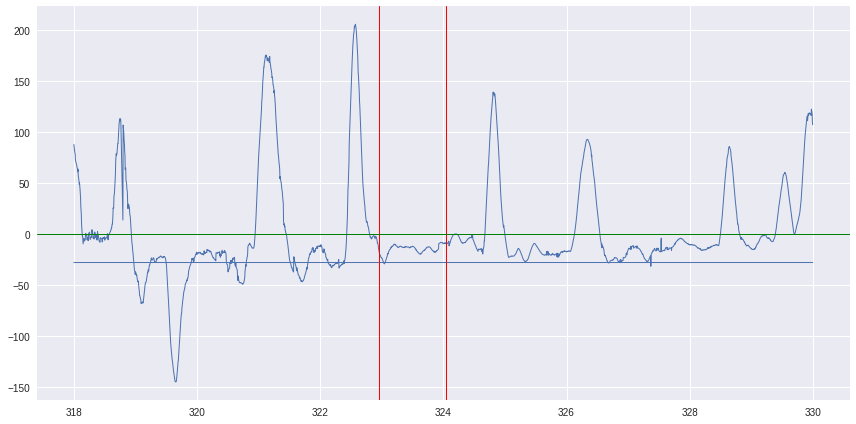

In [111]:
# 320, 325
a, b = 318, 330
xmin, xmax = 322.95, 324.05
dpart = dd5[(dd5['Time']>a) & (dd5['Time']<b)]

g = sns.FacetGrid(data=dpart, size=6, aspect=2)#, ylim=[-30,30])
g.map(plt.plot, "Time", "U", alpha=1, linewidth=1);
g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1);
g.map(plt.axvline, x=xmin, alpha=1, linewidth=1, color='red');
g.map(plt.axvline, x=xmax, alpha=1, linewidth=1, color='red');
g.map(plt.axhline, y=0, alpha=1, linewidth=1, color='green');

In [112]:
dpart5 = dd5[(dd5['Time']>xmin) & (dd5['Time']<xmax)]
dfSRB5 = pd.concat([dfSRB5, dpart5], axis=0, ignore_index=True)

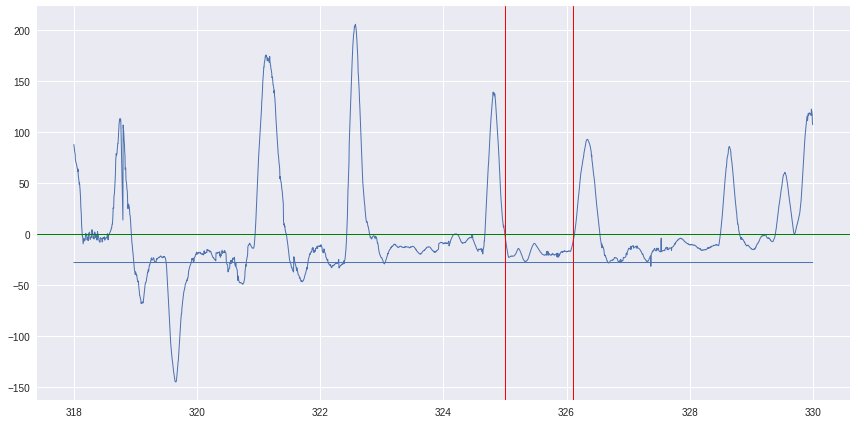

In [113]:
# 320, 325
a, b = 318, 330
xmin, xmax = 325, 326.1
dpart = dd5[(dd5['Time']>a) & (dd5['Time']<b)]

g = sns.FacetGrid(data=dpart, size=6, aspect=2)#, ylim=[-30,30])
g.map(plt.plot, "Time", "U", alpha=1, linewidth=1);
g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1);
g.map(plt.axvline, x=xmin, alpha=1, linewidth=1, color='red');
g.map(plt.axvline, x=xmax, alpha=1, linewidth=1, color='red');
g.map(plt.axhline, y=0, alpha=1, linewidth=1, color='green');

In [114]:
dpart5 = dd5[(dd5['Time']>xmin) & (dd5['Time']<xmax)]
dfSRB5 = pd.concat([dfSRB5, dpart5], axis=0, ignore_index=True)

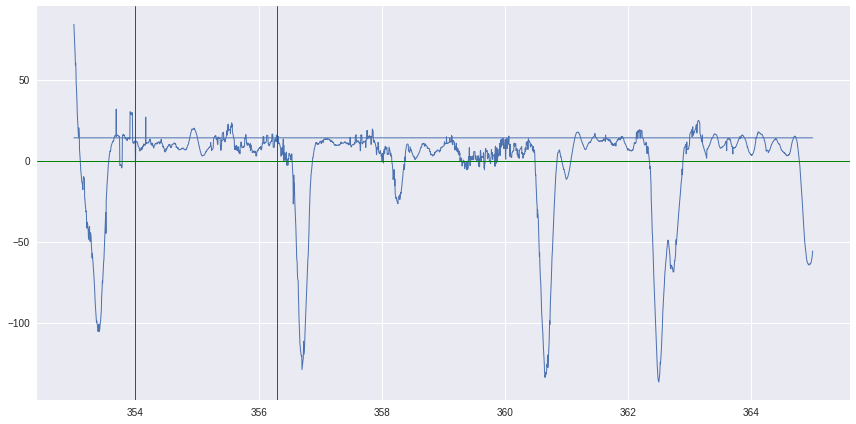

In [115]:
# 355, 365
a, b = 353, 365
xmin, xmax = 354, 356.3
dpart = dd5[(dd5['Time']>a) & (dd5['Time']<b)]

g = sns.FacetGrid(data=dpart, size=6, aspect=2)#, ylim=[-30,30])
g.map(plt.plot, "Time", "U", alpha=1, linewidth=1);
g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1);
g.map(plt.axvline, x=xmin, alpha=1, linewidth=1, color='red');
g.map(plt.axvline, x=xmax, alpha=1, linewidth=1, color='red');
g.map(plt.axhline, y=0, alpha=1, linewidth=1, color='green');

In [116]:
dpart5 = dd5[(dd5['Time']>xmin) & (dd5['Time']<xmax)]
dfSRB5 = pd.concat([dfSRB5, dpart5], axis=0, ignore_index=True)

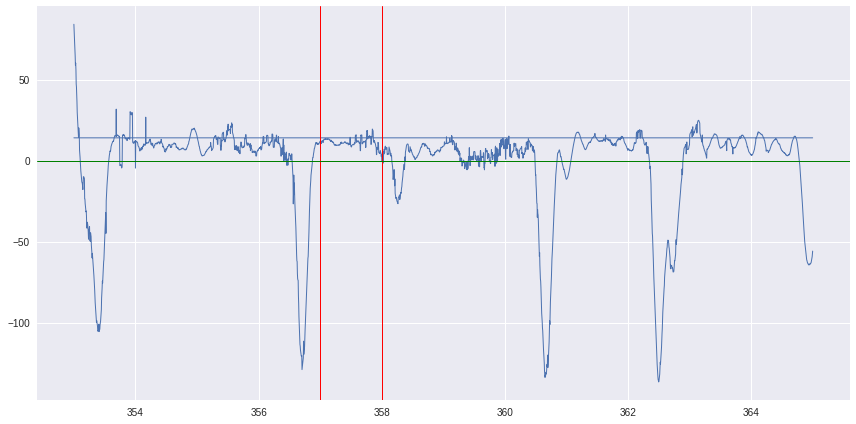

In [117]:
# 355, 365
a, b = 353, 365
xmin, xmax = 357, 358
dpart = dd5[(dd5['Time']>a) & (dd5['Time']<b)]

g = sns.FacetGrid(data=dpart, size=6, aspect=2)#, ylim=[-30,30])
g.map(plt.plot, "Time", "U", alpha=1, linewidth=1);
g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1);
g.map(plt.axvline, x=xmin, alpha=1, linewidth=1, color='red');
g.map(plt.axvline, x=xmax, alpha=1, linewidth=1, color='red');
g.map(plt.axhline, y=0, alpha=1, linewidth=1, color='green');

In [118]:
dpart5 = dd5[(dd5['Time']>xmin) & (dd5['Time']<xmax)]
dfSRB5 = pd.concat([dfSRB5, dpart5], axis=0, ignore_index=True)

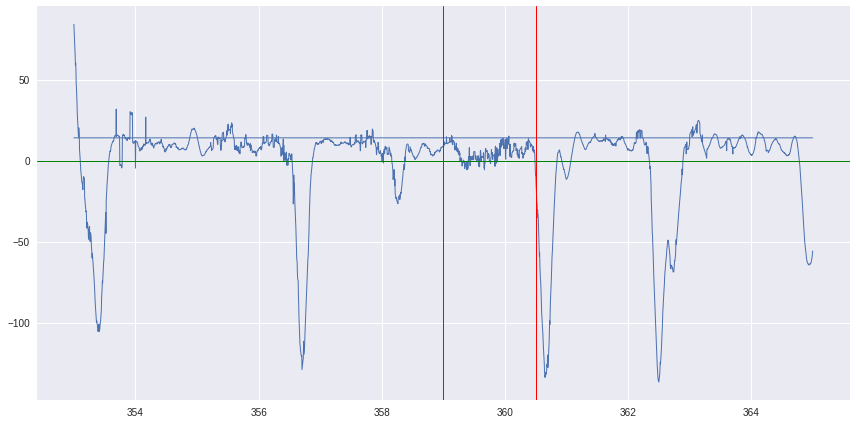

In [119]:
# 355, 365
a, b = 353, 365
xmin, xmax = 359, 360.5
dpart = dd5[(dd5['Time']>a) & (dd5['Time']<b)]

g = sns.FacetGrid(data=dpart, size=6, aspect=2)#, ylim=[-30,30])
g.map(plt.plot, "Time", "U", alpha=1, linewidth=1);
g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1);
g.map(plt.axvline, x=xmin, alpha=1, linewidth=1, color='red');
g.map(plt.axvline, x=xmax, alpha=1, linewidth=1, color='red');
g.map(plt.axhline, y=0, alpha=1, linewidth=1, color='green');

In [120]:
dpart5 = dd5[(dd5['Time']>xmin) & (dd5['Time']<xmax)]
dfSRB5 = pd.concat([dfSRB5, dpart5], axis=0, ignore_index=True)

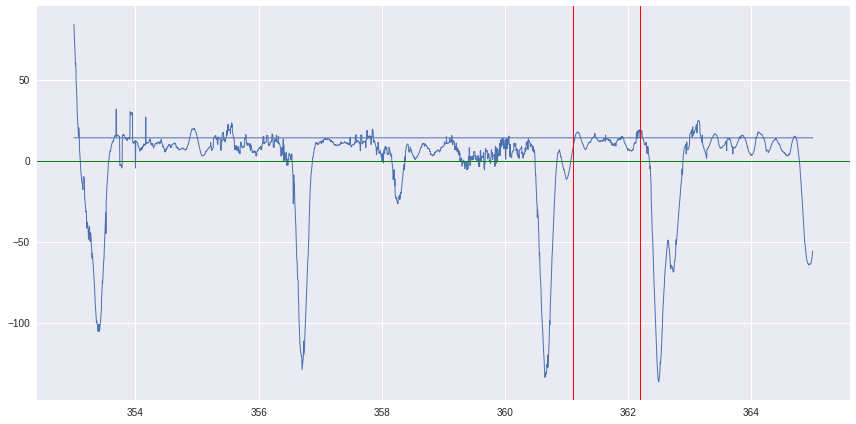

In [121]:
# 355, 365
a, b = 353, 365
xmin, xmax = 361.1, 362.2
dpart = dd5[(dd5['Time']>a) & (dd5['Time']<b)]

g = sns.FacetGrid(data=dpart, size=6, aspect=2)#, ylim=[-30,30])
g.map(plt.plot, "Time", "U", alpha=1, linewidth=1);
g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1);
g.map(plt.axvline, x=xmin, alpha=1, linewidth=1, color='red');
g.map(plt.axvline, x=xmax, alpha=1, linewidth=1, color='red');
g.map(plt.axhline, y=0, alpha=1, linewidth=1, color='green');

In [122]:
dpart5 = dd5[(dd5['Time']>xmin) & (dd5['Time']<xmax)]
dfSRB5 = pd.concat([dfSRB5, dpart5], axis=0, ignore_index=True)

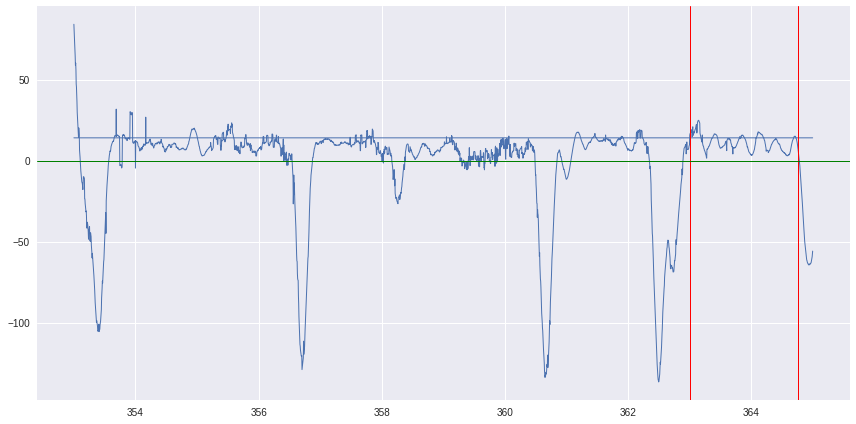

In [123]:
# 355, 365
a, b = 353, 365
xmin, xmax = 363, 364.75
dpart = dd5[(dd5['Time']>a) & (dd5['Time']<b)]

g = sns.FacetGrid(data=dpart, size=6, aspect=2)#, ylim=[-30,30])
g.map(plt.plot, "Time", "U", alpha=1, linewidth=1);
g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1);
g.map(plt.axvline, x=xmin, alpha=1, linewidth=1, color='red');
g.map(plt.axvline, x=xmax, alpha=1, linewidth=1, color='red');
g.map(plt.axhline, y=0, alpha=1, linewidth=1, color='green');

In [124]:
dpart5 = dd5[(dd5['Time']>xmin) & (dd5['Time']<xmax)]
dfSRB5 = pd.concat([dfSRB5, dpart5], axis=0, ignore_index=True)

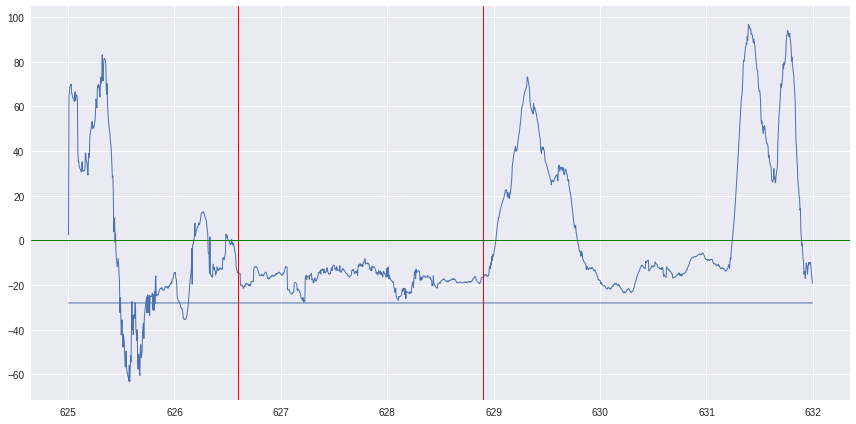

In [125]:
# 630, 631
a, b = 625, 632
xmin, xmax = 626.6, 628.9
dpart = dd5[(dd5['Time']>a) & (dd5['Time']<b)]

g = sns.FacetGrid(data=dpart, size=6, aspect=2)#, ylim=[-30,30])
g.map(plt.plot, "Time", "U", alpha=1, linewidth=1);
g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1);
g.map(plt.axvline, x=xmin, alpha=1, linewidth=1, color='red');
g.map(plt.axvline, x=xmax, alpha=1, linewidth=1, color='red');
g.map(plt.axhline, y=0, alpha=1, linewidth=1, color='green');

In [126]:
dpart5 = dd5[(dd5['Time']>xmin) & (dd5['Time']<xmax)]
dfSRB5 = pd.concat([dfSRB5, dpart5], axis=0, ignore_index=True)

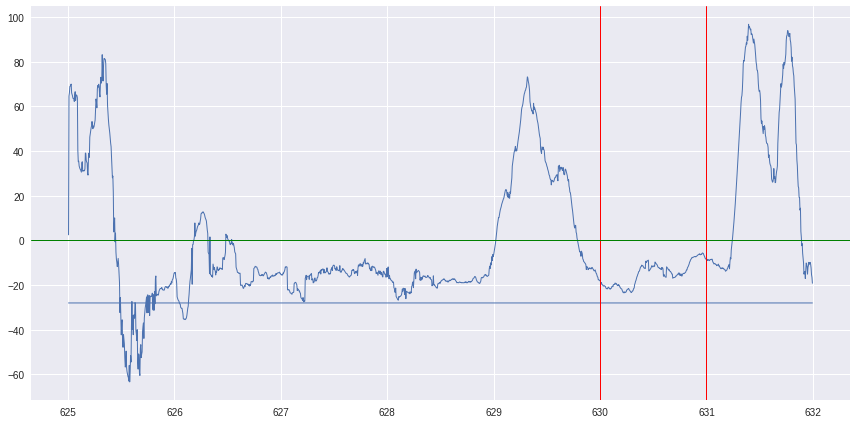

In [127]:
# 630, 631
a, b = 625, 632
xmin, xmax = 630, 631
dpart = dd5[(dd5['Time']>a) & (dd5['Time']<b)]

g = sns.FacetGrid(data=dpart, size=6, aspect=2)#, ylim=[-30,30])
g.map(plt.plot, "Time", "U", alpha=1, linewidth=1);
g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1);
g.map(plt.axvline, x=xmin, alpha=1, linewidth=1, color='red');
g.map(plt.axvline, x=xmax, alpha=1, linewidth=1, color='red');
g.map(plt.axhline, y=0, alpha=1, linewidth=1, color='green');

In [128]:
dpart5 = dd5[(dd5['Time']>xmin) & (dd5['Time']<xmax)]
dfSRB5 = pd.concat([dfSRB5, dpart5], axis=0, ignore_index=True)

## Experiment 6

In [129]:
dfSRB6 = pd.DataFrame()
dd6 = df[df['session_id']==6]
dd6.head(4)

,Frame,Time,X_Pos,Y_Pos,Z_Pos,X_Ori,Y_Ori,Z_Ori,session_id,Filtered,Theta,U,U_var,visible,speed
988880,4109,17.120834,0.031742,0.285504,-0.043582,0.113994,-0.215153,-0.966308,6,1,173.271965,66.320252,NaN,0,0.0
988881,4110,17.125001,0.031456,0.284850,-0.043453,0.109315,-0.209676,-0.967940,6,1,173.556588,68.303914,NaN,0,0.0
988882,4111,17.129168,0.031163,0.284192,-0.043322,0.104573,-0.204424,-0.969478,6,1,173.843560,68.867803,NaN,0,0.0
988883,4112,17.133334,0.030863,0.283532,-0.043196,0.099713,-0.199205,-0.970939,6,1,174.136417,70.296922,NaN,0,0.0


In [130]:
sessions[sessions['session_id']=='6']

,session_id,rat_id,date,experimenter,original_name,video_name,VRspeed
6,6,VR-2B,2017-07-13 03.05.18.468 PM,Nicholas A. Del Grosso,VRAcuityExp_2017-07-13_15-05-16_VR-2B_NIC,VRAcuityExp_2017-07-13_15-05-16_VR-2B_NIC-Came...,[ 0. 7. 14. 28.]


1. 81, 83
2. 84, 85
3. 278, 279
4. 281, 283
5. 305, 310

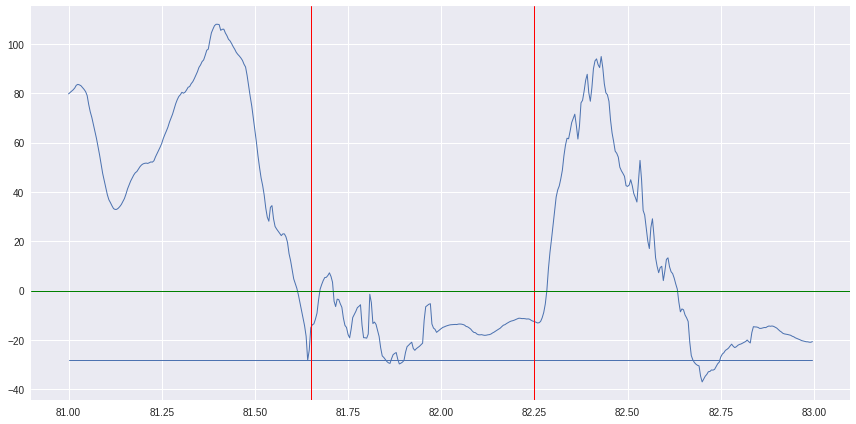

In [131]:
# 81, 83
a, b = 81, 83
xmin, xmax = 81.65, 82.25
dpart = dd6[(dd6['Time']>a) & (dd6['Time']<b)]

g = sns.FacetGrid(data=dpart, size=6, aspect=2)#, ylim=[-30,30])
g.map(plt.plot, "Time", "U", alpha=1, linewidth=1);
g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1);
g.map(plt.axvline, x=xmin, alpha=1, linewidth=1, color='red');
g.map(plt.axvline, x=xmax, alpha=1, linewidth=1, color='red');
g.map(plt.axhline, y=0, alpha=1, linewidth=1, color='green');

In [132]:
dpart6 = dd6[(dd6['Time']>xmin) & (dd6['Time']<xmax)]
dfSRB6 = pd.concat([dfSRB6, dpart6], axis=0, ignore_index=True)

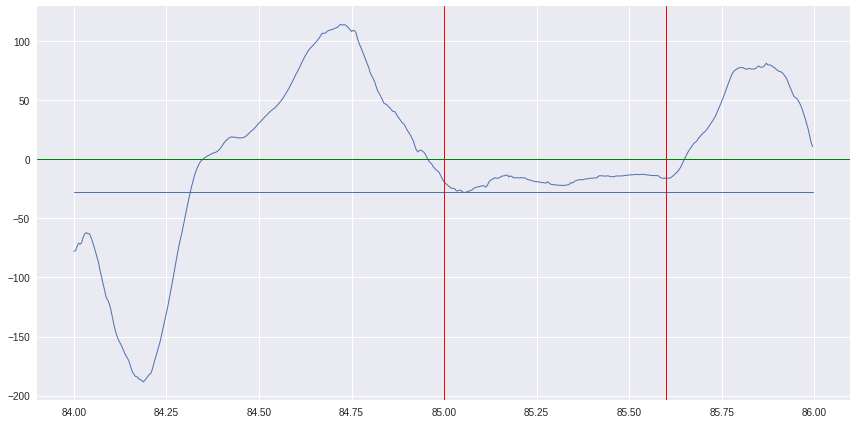

In [133]:
# 85, 86
a, b = 84, 86
xmin, xmax =85, 85.6
dpart = dd6[(dd6['Time']>a) & (dd6['Time']<b)]

g = sns.FacetGrid(data=dpart, size=6, aspect=2)#, ylim=[-30,30])
g.map(plt.plot, "Time", "U", alpha=1, linewidth=1);
g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1);
g.map(plt.axvline, x=xmin, alpha=1, linewidth=1, color='red');
g.map(plt.axvline, x=xmax, alpha=1, linewidth=1, color='red');
g.map(plt.axhline, y=0, alpha=1, linewidth=1, color='green');

In [134]:
dpart6 = dd6[(dd6['Time']>xmin) & (dd6['Time']<xmax)]
dfSRB6 = pd.concat([dfSRB6, dpart6], axis=0, ignore_index=True)

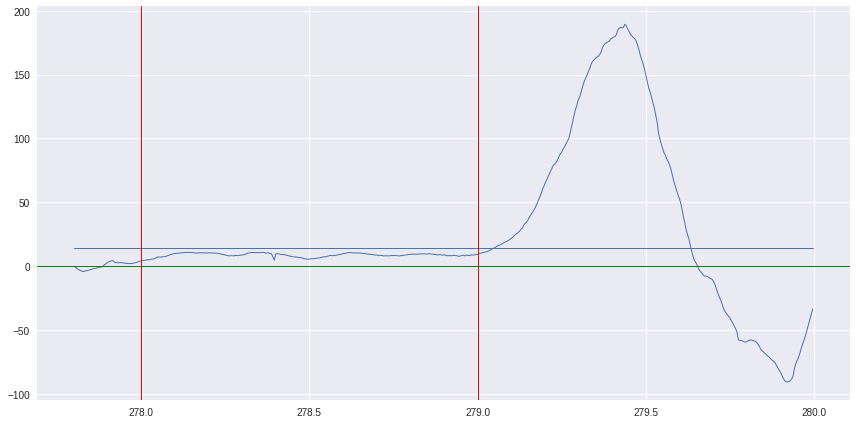

In [135]:
# 278, 279
a, b = 277.8, 280
xmin, xmax =278, 279
dpart = dd6[(dd6['Time']>a) & (dd6['Time']<b)]

g = sns.FacetGrid(data=dpart, size=6, aspect=2)#, ylim=[-30,30])
g.map(plt.plot, "Time", "U", alpha=1, linewidth=1);
g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1);
g.map(plt.axvline, x=xmin, alpha=1, linewidth=1, color='red');
g.map(plt.axvline, x=xmax, alpha=1, linewidth=1, color='red');
g.map(plt.axhline, y=0, alpha=1, linewidth=1, color='green');

In [136]:
dpart6 = dd6[(dd6['Time']>xmin) & (dd6['Time']<xmax)]
dfSRB6 = pd.concat([dfSRB6, dpart6], axis=0, ignore_index=True)

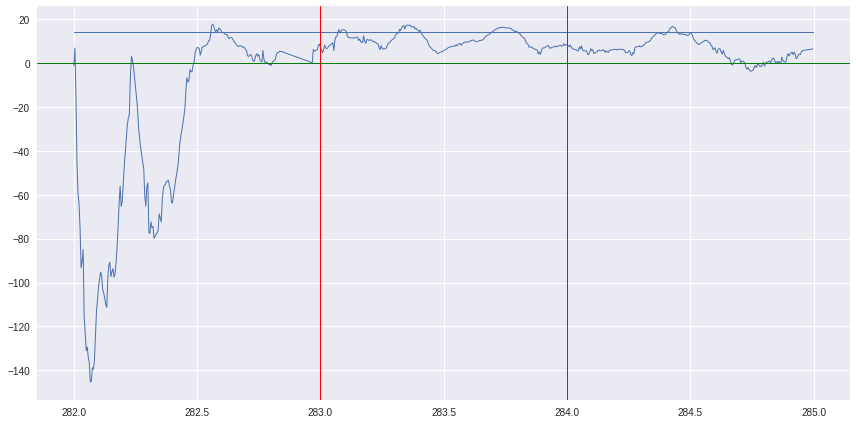

In [137]:
# 281, 283
a, b = 282, 285
xmin, xmax = 283, 284
dpart = dd6[(dd6['Time']>a) & (dd6['Time']<b)]

g = sns.FacetGrid(data=dpart, size=6, aspect=2)#, ylim=[-30,30])
g.map(plt.plot, "Time", "U", alpha=1, linewidth=1);
g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1);
g.map(plt.axvline, x=xmin, alpha=1, linewidth=1, color='red');
g.map(plt.axvline, x=xmax, alpha=1, linewidth=1, color='red');
g.map(plt.axhline, y=0, alpha=1, linewidth=1, color='green');

In [138]:
dpart6 = dd6[(dd6['Time']>xmin) & (dd6['Time']<xmax)]
dfSRB6 = pd.concat([dfSRB6, dpart6], axis=0, ignore_index=True)

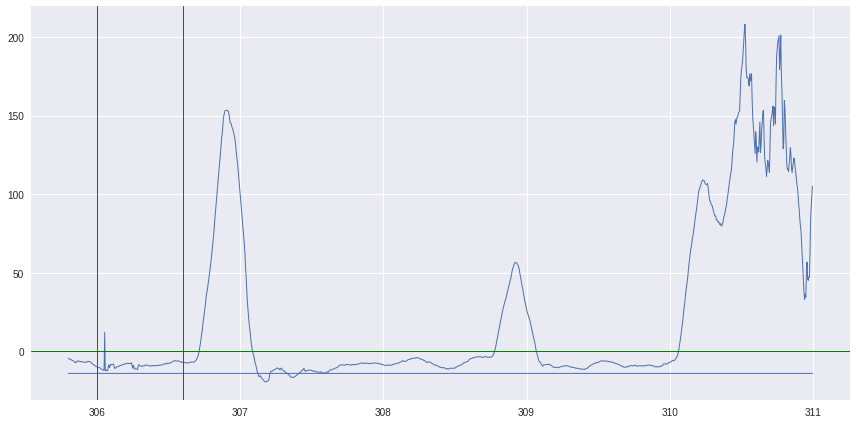

In [139]:
# 305, 310
a, b = 305.8, 311
xmin, xmax = 306, 306.6
dpart = dd6[(dd6['Time']>a) & (dd6['Time']<b)]

g = sns.FacetGrid(data=dpart, size=6, aspect=2)#, ylim=[-30,30])
g.map(plt.plot, "Time", "U", alpha=1, linewidth=1);
g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1);
g.map(plt.axvline, x=xmin, alpha=1, linewidth=1, color='red');
g.map(plt.axvline, x=xmax, alpha=1, linewidth=1, color='red');
g.map(plt.axhline, y=0, alpha=1, linewidth=1, color='green');

In [140]:
dpart6 = dd6[(dd6['Time']>xmin) & (dd6['Time']<xmax)]
dfSRB6 = pd.concat([dfSRB6, dpart6], axis=0, ignore_index=True)

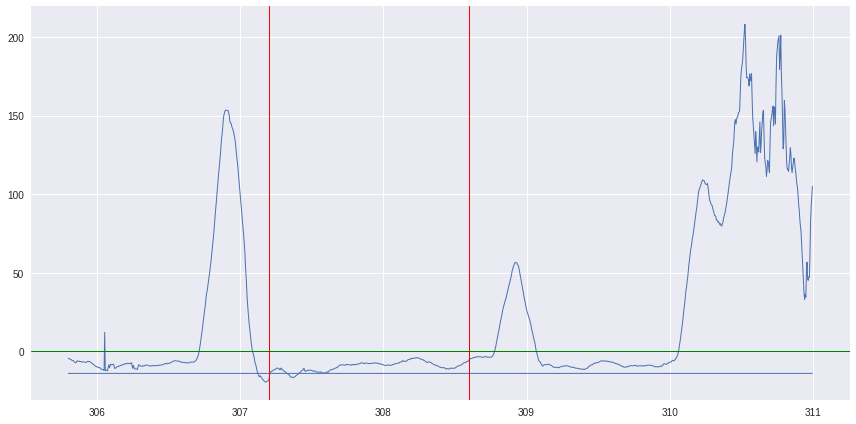

In [141]:
# 305, 310
a, b = 305.8, 311
xmin, xmax = 307.2, 308.6
dpart = dd6[(dd6['Time']>a) & (dd6['Time']<b)]

g = sns.FacetGrid(data=dpart, size=6, aspect=2)#, ylim=[-30,30])
g.map(plt.plot, "Time", "U", alpha=1, linewidth=1);
g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1);
g.map(plt.axvline, x=xmin, alpha=1, linewidth=1, color='red');
g.map(plt.axvline, x=xmax, alpha=1, linewidth=1, color='red');
g.map(plt.axhline, y=0, alpha=1, linewidth=1, color='green');

In [142]:
dpart6 = dd6[(dd6['Time']>xmin) & (dd6['Time']<xmax)]
dfSRB6 = pd.concat([dfSRB6, dpart6], axis=0, ignore_index=True)

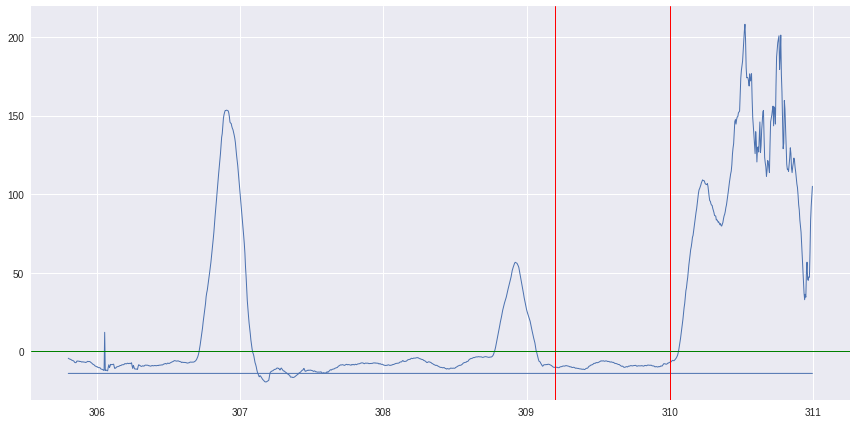

In [143]:
# 305, 310
a, b = 305.8, 311
xmin, xmax = 309.2, 310
dpart = dd6[(dd6['Time']>a) & (dd6['Time']<b)]

g = sns.FacetGrid(data=dpart, size=6, aspect=2)#, ylim=[-30,30])
g.map(plt.plot, "Time", "U", alpha=1, linewidth=1);
g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1);
g.map(plt.axvline, x=xmin, alpha=1, linewidth=1, color='red');
g.map(plt.axvline, x=xmax, alpha=1, linewidth=1, color='red');
g.map(plt.axhline, y=0, alpha=1, linewidth=1, color='green');

In [144]:
dpart6 = dd6[(dd6['Time']>xmin) & (dd6['Time']<xmax)]
dfSRB6 = pd.concat([dfSRB6, dpart6], axis=0, ignore_index=True)

## Experiment 7

In [145]:
dfSRB7 = pd.DataFrame()
dd7 = df[df['session_id']==7]
dd7.head(4)

,Frame,Time,X_Pos,Y_Pos,Z_Pos,X_Ori,Y_Ori,Z_Ori,session_id,Filtered,Theta,U,U_var,visible,speed
1133284,21,0.087500,-0.066369,0.065571,-0.070943,-0.677690,-0.677397,-0.276885,7,1,-112.223551,99.774638,NaN,0,0.0
1133285,22,0.091667,-0.066512,0.065381,-0.070722,-0.679130,-0.677830,-0.271897,7,1,-111.819228,97.029711,NaN,0,0.0
1133286,23,0.095833,-0.066656,0.065213,-0.070492,-0.680284,-0.678507,-0.266863,7,1,-111.419164,96.030724,NaN,0,0.0
1133287,24,0.100000,-0.066797,0.065054,-0.070257,-0.681304,-0.679277,-0.261897,7,1,-111.027058,94.097976,NaN,0,0.0


In [146]:
sessions[sessions['session_id']=='7']

,session_id,rat_id,date,experimenter,original_name,video_name,VRspeed
7,7,VR-1A,2017-07-13 03.38.35.628 PM,Nicholas A. Del Grosso,VRAcuityExp_2017-07-13_15-38-34_VR-1A_NIC,VRAcuityExp_2017-07-13_15-38-34_VR-1A_NIC-Came...,[ 0. 7. 14. 28.]


1. 71, 73
2. 115, 120
3. 157, 159
4. 225, 230
5. 232, 234
6. 325, 330 - rejected

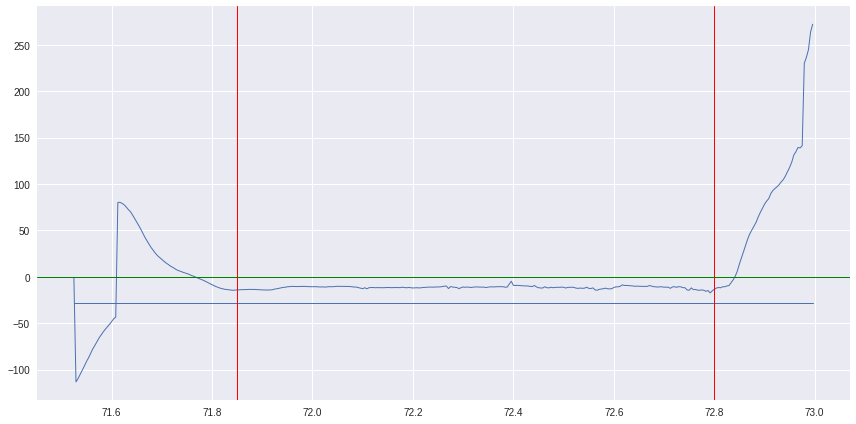

In [147]:
# 71, 73
a, b = 71, 73
xmin, xmax = 71.85, 72.8
dpart = dd7[(dd7['Time']>a) & (dd7['Time']<b)]

g = sns.FacetGrid(data=dpart, size=6, aspect=2)#, ylim=[-30,30])
g.map(plt.plot, "Time", "U", alpha=1, linewidth=1);
g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1);
g.map(plt.axvline, x=xmin, alpha=1, linewidth=1, color='red');
g.map(plt.axvline, x=xmax, alpha=1, linewidth=1, color='red');
g.map(plt.axhline, y=0, alpha=1, linewidth=1, color='green');

In [148]:
dpart7 = dd7[(dd7['Time']>xmin) & (dd7['Time']<xmax)]
dfSRB7 = pd.concat([dfSRB7, dpart7], axis=0, ignore_index=True)

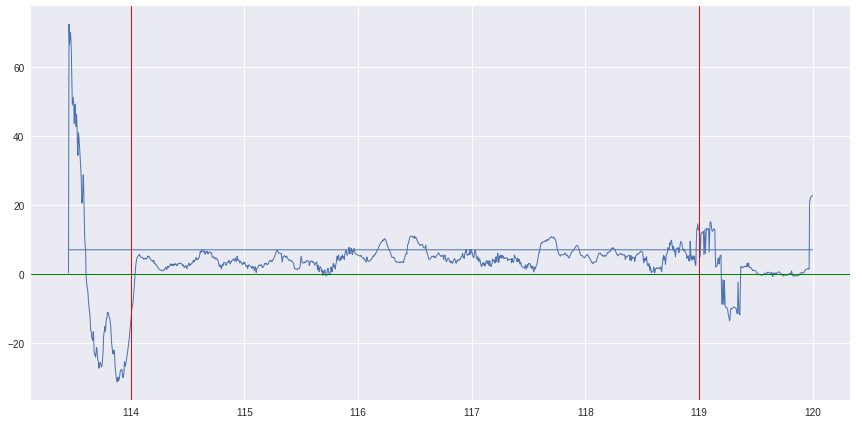

In [149]:
# 115, 120
a, b = 113, 120
xmin, xmax = 114, 119
dpart = dd7[(dd7['Time']>a) & (dd7['Time']<b)]

g = sns.FacetGrid(data=dpart, size=6, aspect=2)#, ylim=[-30,30])
g.map(plt.plot, "Time", "U", alpha=1, linewidth=1);
g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1);
g.map(plt.axvline, x=xmin, alpha=1, linewidth=1, color='red');
g.map(plt.axvline, x=xmax, alpha=1, linewidth=1, color='red');
g.map(plt.axhline, y=0, alpha=1, linewidth=1, color='green');

In [150]:
dpart7 = dd7[(dd7['Time']>xmin) & (dd7['Time']<xmax)]
dfSRB7 = pd.concat([dfSRB7, dpart7], axis=0, ignore_index=True)

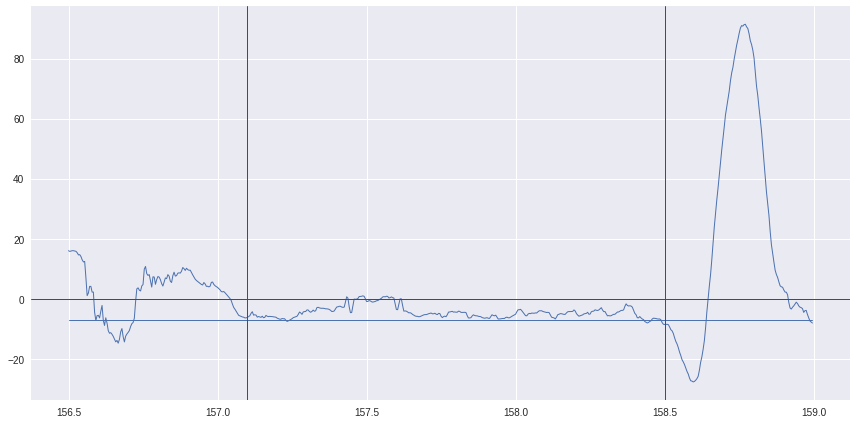

In [151]:
# 157, 159
a, b = 156.5, 159
xmin, xmax = 157.1, 158.5
dpart = dd7[(dd7['Time']>a) & (dd7['Time']<b)]

g = sns.FacetGrid(data=dpart, size=6, aspect=2)#, ylim=[-30,30])
g.map(plt.plot, "Time", "U", alpha=1, linewidth=1);
g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1);
g.map(plt.axvline, x=xmin, alpha=1, linewidth=1, color='red');
g.map(plt.axvline, x=xmax, alpha=1, linewidth=1, color='red');
g.map(plt.axhline, y=0, alpha=1, linewidth=1, color='green');

In [152]:
dpart7 = dd7[(dd7['Time']>xmin) & (dd7['Time']<xmax)]
dfSRB7 = pd.concat([dfSRB7, dpart7], axis=0, ignore_index=True)

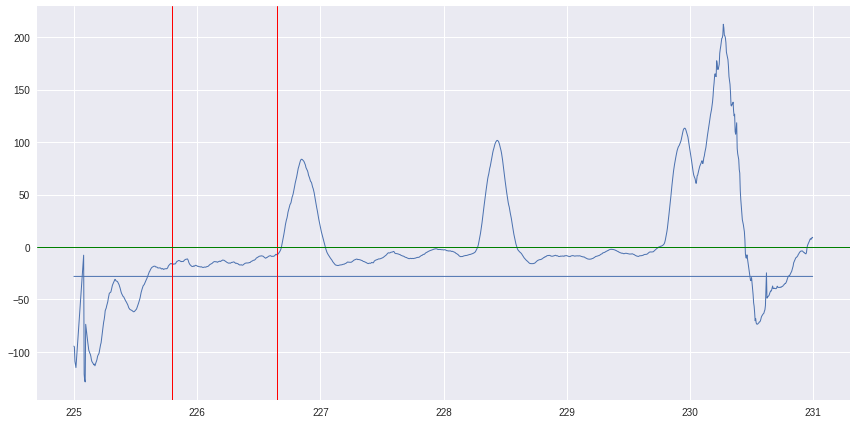

In [153]:
# 225, 230
a, b = 225, 231
xmin, xmax = 225.8, 226.65
dpart = dd7[(dd7['Time']>a) & (dd7['Time']<b)]

g = sns.FacetGrid(data=dpart, size=6, aspect=2)#, ylim=[-30,30])
g.map(plt.plot, "Time", "U", alpha=1, linewidth=1);
g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1);
g.map(plt.axvline, x=xmin, alpha=1, linewidth=1, color='red');
g.map(plt.axvline, x=xmax, alpha=1, linewidth=1, color='red');
g.map(plt.axhline, y=0, alpha=1, linewidth=1, color='green');

In [154]:
dpart7 = dd7[(dd7['Time']>xmin) & (dd7['Time']<xmax)]
dfSRB7 = pd.concat([dfSRB7, dpart7], axis=0, ignore_index=True)

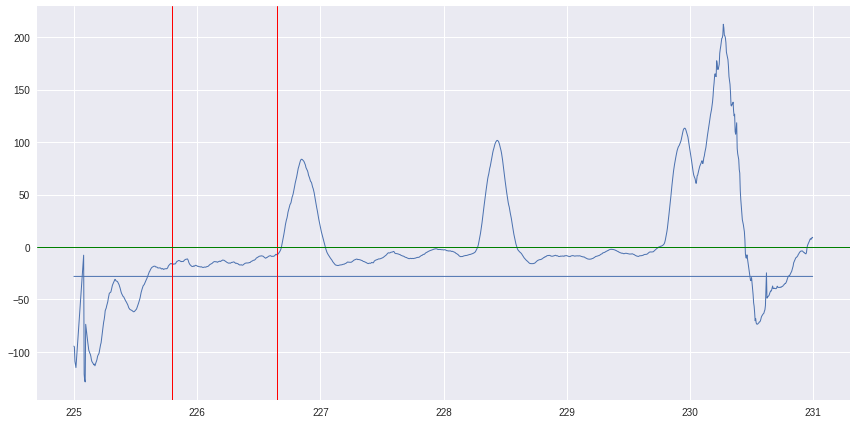

In [155]:
# 225, 230
a, b = 225, 231
xmin, xmax = 225.8, 226.65
dpart = dd7[(dd7['Time']>a) & (dd7['Time']<b)]

g = sns.FacetGrid(data=dpart, size=6, aspect=2)#, ylim=[-30,30])
g.map(plt.plot, "Time", "U", alpha=1, linewidth=1);
g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1);
g.map(plt.axvline, x=xmin, alpha=1, linewidth=1, color='red');
g.map(plt.axvline, x=xmax, alpha=1, linewidth=1, color='red');
g.map(plt.axhline, y=0, alpha=1, linewidth=1, color='green');

In [156]:
dpart7 = dd7[(dd7['Time']>xmin) & (dd7['Time']<xmax)]
dfSRB7 = pd.concat([dfSRB7, dpart7], axis=0, ignore_index=True)

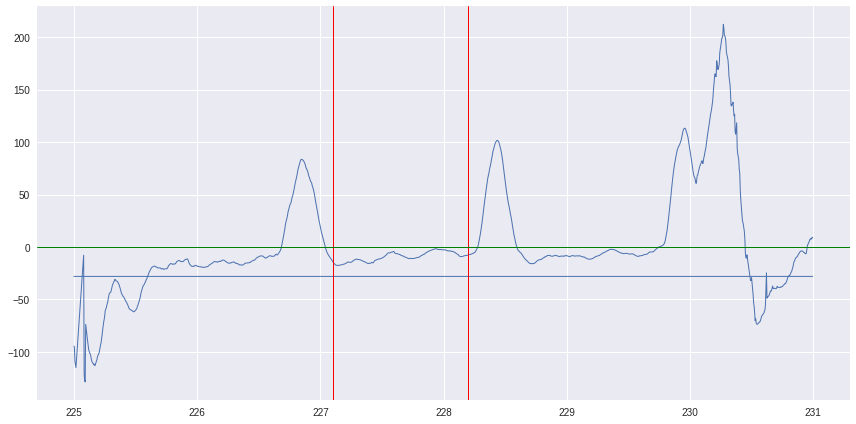

In [157]:
# 225, 230
a, b = 225, 231
xmin, xmax = 227.1, 228.2
dpart = dd7[(dd7['Time']>a) & (dd7['Time']<b)]

g = sns.FacetGrid(data=dpart, size=6, aspect=2)#, ylim=[-30,30])
g.map(plt.plot, "Time", "U", alpha=1, linewidth=1);
g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1);
g.map(plt.axvline, x=xmin, alpha=1, linewidth=1, color='red');
g.map(plt.axvline, x=xmax, alpha=1, linewidth=1, color='red');
g.map(plt.axhline, y=0, alpha=1, linewidth=1, color='green');

In [158]:
dpart7 = dd7[(dd7['Time']>xmin) & (dd7['Time']<xmax)]
dfSRB7 = pd.concat([dfSRB7, dpart7], axis=0, ignore_index=True)

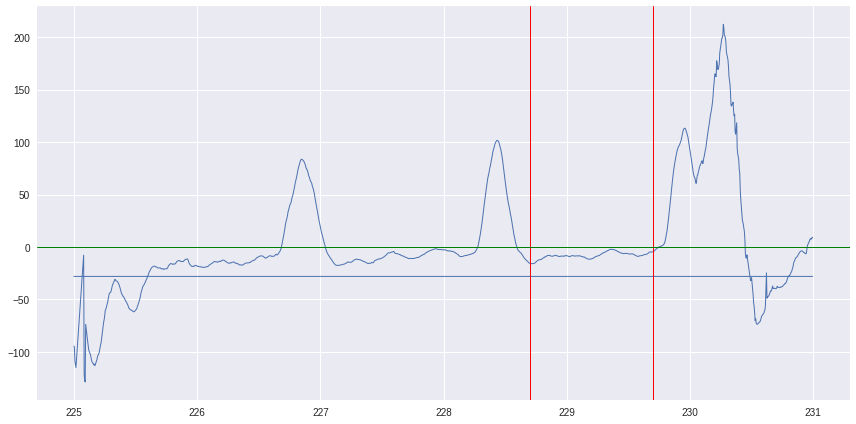

In [159]:
# 225, 230
a, b = 225, 231
xmin, xmax = 228.7, 229.7
dpart = dd7[(dd7['Time']>a) & (dd7['Time']<b)]

g = sns.FacetGrid(data=dpart, size=6, aspect=2)#, ylim=[-30,30])
g.map(plt.plot, "Time", "U", alpha=1, linewidth=1);
g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1);
g.map(plt.axvline, x=xmin, alpha=1, linewidth=1, color='red');
g.map(plt.axvline, x=xmax, alpha=1, linewidth=1, color='red');
g.map(plt.axhline, y=0, alpha=1, linewidth=1, color='green');

In [160]:
dpart7 = dd7[(dd7['Time']>xmin) & (dd7['Time']<xmax)]
dfSRB7 = pd.concat([dfSRB7, dpart7], axis=0, ignore_index=True)

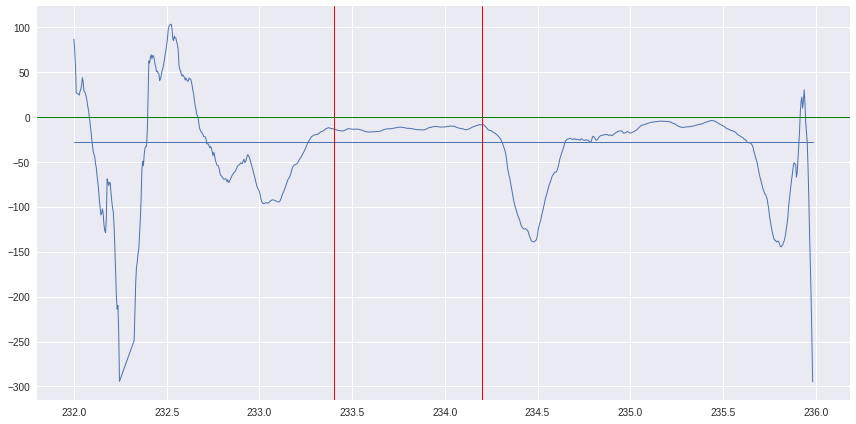

In [161]:
# 232, 234
a, b = 232, 236
xmin, xmax = 233.4, 234.2
dpart = dd7[(dd7['Time']>a) & (dd7['Time']<b)]

g = sns.FacetGrid(data=dpart, size=6, aspect=2)#, ylim=[-30,30])
g.map(plt.plot, "Time", "U", alpha=1, linewidth=1);
g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1);
g.map(plt.axvline, x=xmin, alpha=1, linewidth=1, color='red');
g.map(plt.axvline, x=xmax, alpha=1, linewidth=1, color='red');
g.map(plt.axhline, y=0, alpha=1, linewidth=1, color='green');

In [162]:
dpart7 = dd7[(dd7['Time']>xmin) & (dd7['Time']<xmax)]
dfSRB7 = pd.concat([dfSRB7, dpart7], axis=0, ignore_index=True)

# Experiment Merge and Visualization

In [166]:
dfSRB = pd.DataFrame()
dfSRB = pd.concat([dfSRB, dfSRB0], axis=0, ignore_index=True)
dfSRB = pd.concat([dfSRB, dfSRB1], axis=0, ignore_index=True)
dfSRB = pd.concat([dfSRB, dfSRB2], axis=0, ignore_index=True)
dfSRB = pd.concat([dfSRB, dfSRB3], axis=0, ignore_index=True)
dfSRB = pd.concat([dfSRB, dfSRB4], axis=0, ignore_index=True)
dfSRB = pd.concat([dfSRB, dfSRB5], axis=0, ignore_index=True)
dfSRB = pd.concat([dfSRB, dfSRB6], axis=0, ignore_index=True)
dfSRB = pd.concat([dfSRB, dfSRB7], axis=0, ignore_index=True)

dfSRB.head(2)

,Frame,Time,X_Pos,Y_Pos,Z_Pos,X_Ori,Y_Ori,Z_Ori,session_id,Filtered,Theta,U,U_var,visible,speed
0,37440,156.000010,0.093441,0.165644,-0.054762,0.879993,0.424692,-0.212234,0,1,103.559478,-9.052831,2.093787,1,-14.0
1,37441,156.004177,0.093453,0.165645,-0.054730,0.880194,0.424575,-0.211656,0,1,103.520946,-9.246986,2.068201,1,-14.0


In [165]:
len(dfSRB) * 100/ len(rat)

2.433785672025076

In [184]:
l, lsrb = {}, {}
for i, dd in rat.groupby('session_id'):
    l[i] = len(dd) 
    
for i, dd in dfSRB.groupby('session_id'):
    print('SRB in session {:1}: {:.3%}'.format(i, len(dd)/l[i]))

SRB in session 0: 1.995%
SRB in session 1: 2.165%
SRB in session 2: 3.568%
SRB in session 3: 1.281%
SRB in session 4: 2.175%
SRB in session 5: 5.629%
SRB in session 6: 0.997%
SRB in session 7: 2.081%


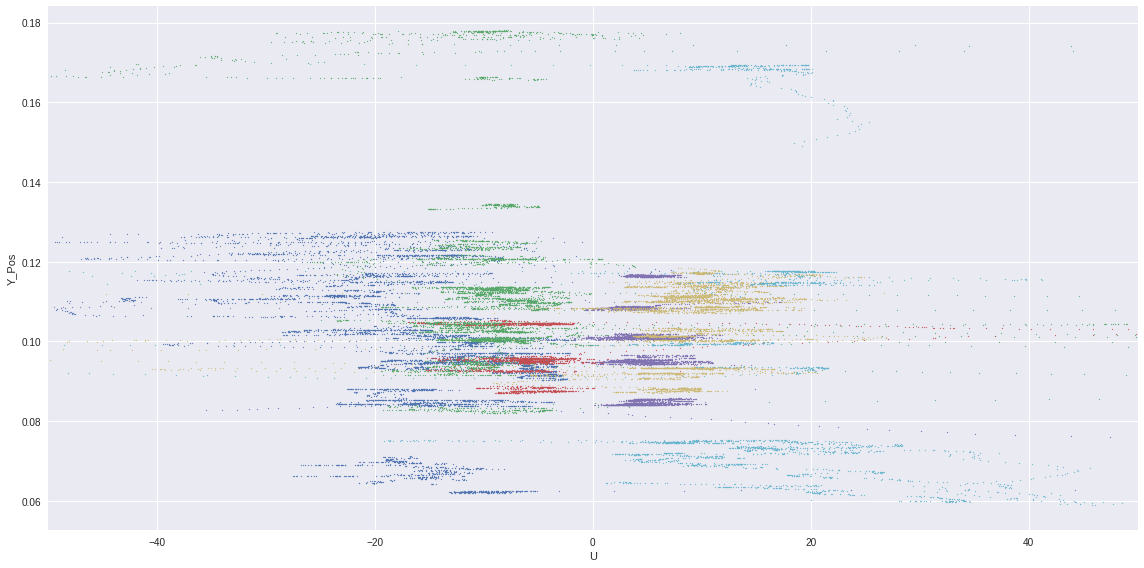

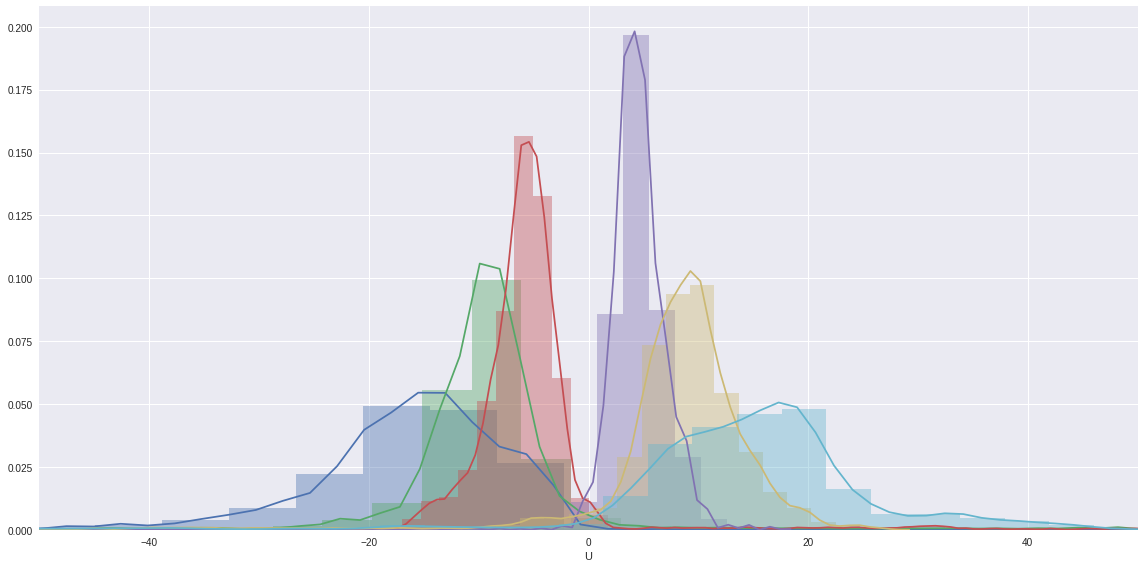

In [185]:
g = sns.FacetGrid( data=dfSRB, size=8, aspect=2, xlim=[-50,50], hue='speed')
g.map(plt.scatter,'U', "Y_Pos", alpha=0.8, s=1);

g = sns.FacetGrid( data=dfSRB, size=8, aspect=2, xlim=[-50,50], hue='speed')
g.map(sns.distplot, 'U');


In [186]:
import datashader as ds
from matplotlib import rcParams, cm

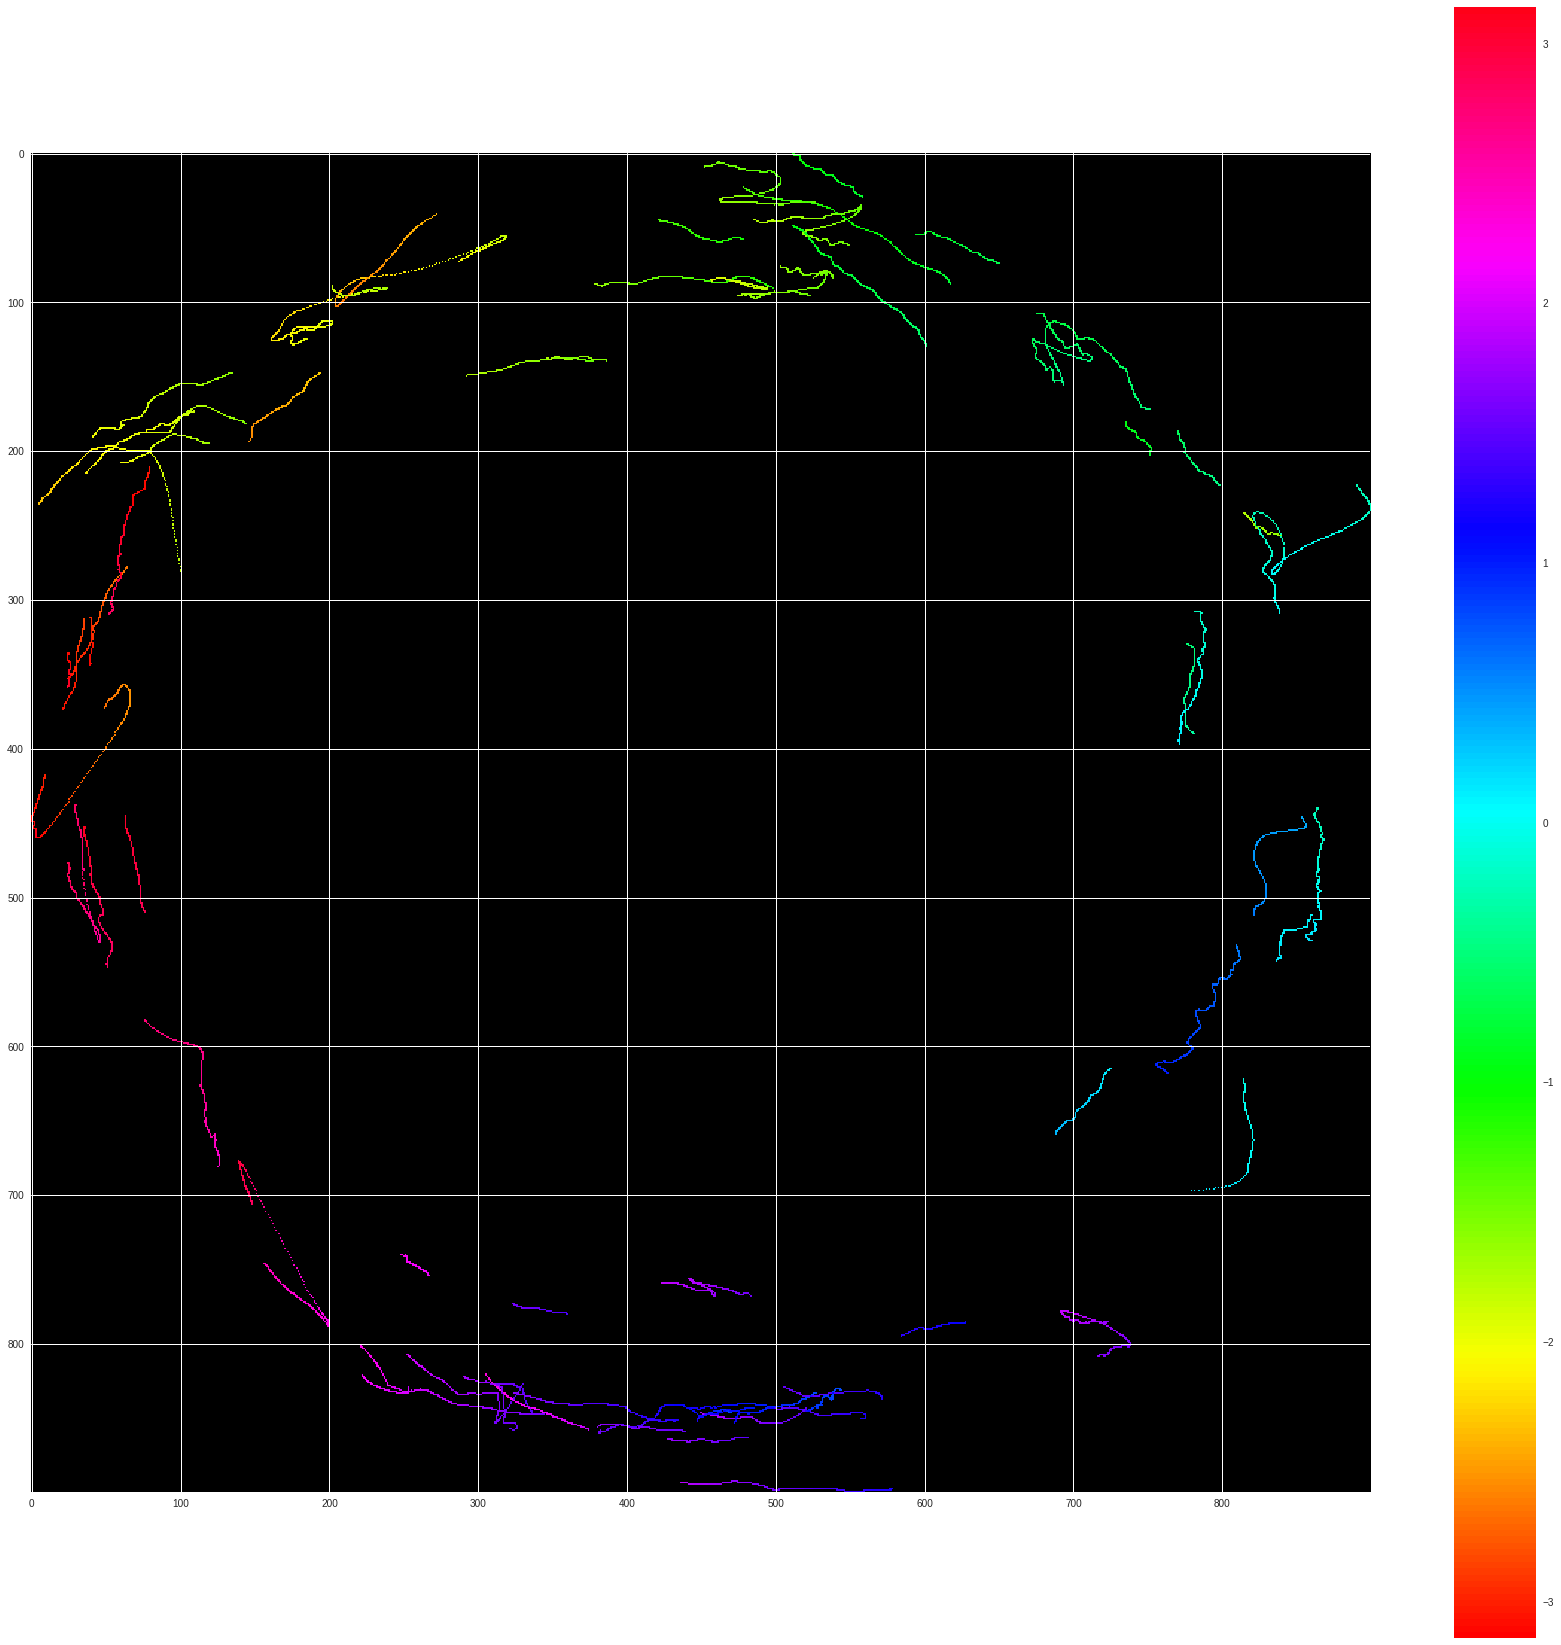

In [188]:
cvs = ds.Canvas(plot_height=900, plot_width=900)
agg_z =cvs.points(source=dfSRB, x='X_Pos', y='Z_Pos', agg=ds.mean('Z_Ori'))
agg_x =cvs.points(source=dfSRB, x='X_Pos', y='Z_Pos', agg=ds.mean('X_Ori'))


# np.linalg.norm(agg)
agg_xn = agg_x / np.sqrt(agg_x ** 2 + agg_z ** 2)
agg_zn = agg_z / np.sqrt(agg_x ** 2 + agg_z ** 2)

theta = np.arctan2(agg_zn, agg_xn)

cm.hsv.set_bad('black')
plt.figure(figsize=(30, 30))
plt.imshow(theta, cmap=cm.hsv)

plt.colorbar();